In [2]:
# load tools, load data, correct data

%matplotlib notebook

In [3]:
import caapp_gamut_plots as cgp
from collections import Counter
import numpy as np
import warnings
warnings.simplefilter("ignore")

# load the dataset we want to look at
# you only need to run this cell once


#data_path = "data/Masked_Helius_subset_May17/"
data_path = "data/GoEFs_Jul17/"


light_spreadsheet_path = "data/5_day_light.txt"

dataframes = cgp.loadData( data_path, light_spreadsheet_path )
    

# define a function to identify plants form "early" experiments (which should be corrected)
def isEarly( plantLabel ):
    expId_parts = plantLabel.split("[")[3].split("_")
    try: 
        return int(expId_parts[0]) <= 21
    except ValueError:
        return True

# define a function to correct spreadsheets
def correctDataFrame( parameter, correctionFactor ):
    corrected = dataframes[parameter].copy( deep = True )
    print( "corrected {0} dataframe in-place".format( parameter ) )
    for plantLabel in corrected.index:
        if( isEarly( plantLabel ) ):
            corrected.loc[plantLabel,:] /= correctionFactor
    dataframes[parameter] = corrected
    
# correct the computed qesv and npq dataframes (divide early results by these time-resolved factors)
# Use a single number wtihout square brackets to apply the same correction to all timepoints
correctDataFrame( "QESV", [4.408522061, 4.482793944, 4.582105093, 4.728140056, 4.926178359, 5.146209987, 5.468185366, 5.724655565, 6.126662326, 6.327001587, 6.573081846, 6.490570675, 6.448794565, 6.294517319, 6.196914601, 6.100975853, 4.909532161, 4.394984156, 4.025067785, 3.698798448, 3.447793078, 3.492812848, 3.520038425, 3.587070402, 3.534401464, 3.461472268, 3.35683648, 3.319207134, 3.170993758, 3.258615723, 3.222937692, 3.301296021, 3.336765235, 3.352455553, 3.468204969, 3.475532513, 3.693294933, 3.73095491, 3.803247331, 3.801401169, 3.762185828, 3.683453326, 3.768541748, 3.883820563, 4.292838442, 4.831735712, 5.694317858, 7.593912217, 5.581625682, 4.423229244, 4.544335692, 3.650218294, 3.927280329, 3.432547646, 3.590772123, 3.460353409, 3.401602045, 3.233799135, 3.351837913, 2.961318246, 3.286172775, 2.666655728, 3.285709608, 2.568940627, 3.266761676, 2.37439829, 3.252638397, 2.277036052, 3.231254426, 2.219316706, 3.240105532, 2.154120096, 3.117308411, 2.112489099, 3.153073042, 2.083297558, 3.112022265, 2.115273028, 3.140837405, 2.08355694, 3.160740166, 2.093101532, 3.148594353, 2.102211949, 3.198329541, 2.096157933, 3.177241733, 2.125125565, 3.301354001, 2.18722597, 3.281684088, 2.260231164, 3.321438817, 2.33818573, 3.314646517, 2.447920619, 3.357536138, 2.663189568, 3.419077431, 2.771891619, 3.588067482, 3.123955442, 3.750784614, 3.427024511, 4.01717305, 3.713431709, 4.482386152, 3.913281681, 5.312464148, 4.427507252, 7.453297318, 5.868913726, 4.316760151, 4.43905074, 4.649269227, 4.889446844, 5.407113591, 6.14227428, 7.099395551, 7.985683474, 9.389688957, 10.71923893, 12.60355675, 13.72458983, 14.54352573, 14.28871383, 14.46159573, 14.15165443, 4.347401138, 3.944127635, 4.904343301, 3.739995479, 3.970988641, 3.432370523, 3.711048348, 3.374423317, 3.488268007, 3.245013168, 3.353292167, 3.075303967, 3.156691835, 2.832867973, 3.051510025, 2.78268795, 2.967769051, 2.565162278, 2.937472199, 2.436954056, 2.901021564, 2.355793661, 2.922060618, 2.2864608, 2.844516503, 2.199292712, 2.892461045, 2.152019389, 2.877431284, 2.169045889, 2.929768254, 2.159943889, 2.957164602, 2.179521566, 2.947908786, 2.179040064, 2.977992445, 2.154327625, 2.973655057, 2.171932635, 3.081126374, 2.245198513, 3.071467129, 2.328311827, 3.125263036, 2.402615123, 3.18535639, 2.503660965, 3.289112271, 2.710635552, 3.410290675, 2.779966737, 3.614669707, 3.042628166, 3.785891308, 3.296451512, 4.007971706, 3.584571304, 4.34130359, 3.906129767, 4.903947325, 4.438429874, 6.187125272, 5.316409339])
correctDataFrame( "NPQ", [3.656065789, 3.749162112, 3.857506714, 3.995438534, 4.170041658, 4.38662965, 4.66407628, 4.955318144, 5.258915832, 5.447006258, 5.537336278, 5.428241126, 5.337435157, 5.195372357, 5.101296628, 4.987339213, 4.339063749, 3.770649191, 3.395684715, 3.144316914, 2.996143693, 3.089791701, 3.199530852, 3.337442575, 3.377800082, 3.383128136, 3.340156135, 3.355498769, 3.217896914, 3.295355834, 3.274440209, 3.338369321, 3.354339484, 3.360753919, 3.438222893, 3.42470645, 3.592653443, 3.542711713, 3.526759437, 3.447090443, 3.342390968, 3.213267821, 3.232419712, 3.302963814, 3.559501688, 3.960213964, 4.705964683, 6.872244315, 5.000351962, 4.061780343, 4.194794999, 3.335531055, 3.61693431, 3.153792094, 3.278880187, 3.265608202, 3.064150043, 3.224050605, 3.023019525, 3.078524315, 2.977951079, 2.836029616, 3.013499221, 2.757628113, 3.040356811, 2.551550025, 3.075908596, 2.448107699, 3.096403633, 2.385349326, 3.151534371, 2.311433806, 3.04833932, 2.260641335, 3.089716516, 2.228433347, 3.055891366, 2.267966207, 3.080624954, 2.231756151, 3.096165266, 2.244260675, 3.069893711, 2.256641779, 3.097601241, 2.248902881, 3.052696574, 2.283429896, 3.142136003, 2.356644991, 3.067758856, 2.437553928, 3.05053089, 2.523226697, 3.005246304, 2.632795478, 3.003807792, 2.846819779, 3.034781479, 2.914500969, 3.184893676, 3.174040232, 3.337331888, 3.317593656, 3.634014569, 3.397272189, 4.068118833, 3.478141089, 4.801805252, 3.916414307, 6.563335481, 5.263937099, 4.0572413, 4.20729092, 4.404767175, 4.683482769, 5.191852052, 5.909441606, 6.905087245, 8.11431662, 9.909080742, 11.87000289, 14.27757169, 15.91470044, 16.40885007, 16.64918343, 16.28388024, 15.88990551, 3.845966473, 3.472433672, 4.528770169, 3.192607385, 3.494133264, 3.018078737, 3.248814477, 3.057717112, 3.075222842, 3.090932663, 2.986475833, 3.073544029, 2.85251946, 2.939001329, 2.793947614, 2.935585298, 2.750861514, 2.732583579, 2.752362838, 2.609385322, 2.749450342, 2.526102627, 2.798845652, 2.453415929, 2.742284674, 2.355732158, 2.788027205, 2.300204764, 2.779002601, 2.324048321, 2.831037006, 2.315331483, 2.847683185, 2.340381503, 2.837920431, 2.343583017, 2.850701189, 2.314467766, 2.832199545, 2.332823596, 2.909659904, 2.420302369, 2.871532456, 2.51212917, 2.879048962, 2.586721188, 2.889211351, 2.680650082, 2.94748771, 2.873091851, 3.006749326, 2.891949808, 3.1472435, 3.049851303, 3.265189502, 3.143221299, 3.484941293, 3.236206734, 3.817178127, 3.357366766, 4.274156824, 3.673363698, 5.150752903, 4.49270604])
correctDataFrame( "PhiNO", [0.679340457, 0.676321599, 0.674329152, 0.671057703, 0.669618127, 0.666737978, 0.661676911, 0.65809062, 0.654659663, 0.652452652, 0.650452014, 0.650392767, 0.650743495, 0.650128036, 0.650850021, 0.64995757, 0.665604071, 0.667625426, 0.667257927, 0.675625476, 0.681896967, 0.679833568, 0.661180369, 0.641733217, 0.6244069, 0.61289981, 0.604692399, 0.597116304, 0.599707216, 0.595064428, 0.59431618, 0.592452666, 0.594163186, 0.592810522, 0.591524209, 0.59518999, 0.593631377, 0.607333732, 0.621764766, 0.639069159, 0.659095097, 0.673571503, 0.676492625, 0.664847273, 0.648935307, 0.63834835, 0.632908335, 0.624477396, 0.640850328, 0.653305479, 0.642820986, 0.656464564, 0.636973012, 0.648256429, 0.633749058, 0.614566804, 0.631033294, 0.585225031, 0.624732802, 0.573204433, 0.612930709, 0.577648989, 0.599843847, 0.577840797, 0.585859728, 0.590403471, 0.575167281, 0.598119611, 0.566340512, 0.602464732, 0.558045873, 0.607905756, 0.561377782, 0.611818857, 0.557384807, 0.614660596, 0.557192798, 0.613734523, 0.556748945, 0.61325058, 0.556410198, 0.611508315, 0.559155956, 0.609797301, 0.559252577, 0.609896664, 0.564039727, 0.60710005, 0.562014147, 0.599779116, 0.570810372, 0.592624758, 0.577655699, 0.585145948, 0.585606037, 0.576050285, 0.590767747, 0.560656071, 0.589637677, 0.55717108, 0.583259864, 0.547739797, 0.575124338, 0.552381161, 0.567621144, 0.564966662, 0.56167694, 0.574192805, 0.557434823, 0.569171352, 0.54887336, 0.566129313, 0.611717926, 0.603062263, 0.602851769, 0.60244461, 0.599193168, 0.59669832, 0.593187692, 0.591629049, 0.58991098, 0.590965444, 0.592004475, 0.594538369, 0.597110715, 0.599477467, 0.601072063, 0.602792071, 0.618516278, 0.626094817, 0.615373023, 0.626426386, 0.618268659, 0.628953557, 0.612065701, 0.618910294, 0.610955692, 0.598655285, 0.609669645, 0.583006563, 0.612145655, 0.579906967, 0.614475728, 0.571453783, 0.614353412, 0.581195551, 0.612003462, 0.588108015, 0.609532968, 0.593530507, 0.605834437, 0.599060762, 0.607108296, 0.607140098, 0.603873879, 0.612766492, 0.604702355, 0.611415316, 0.600603121, 0.611915589, 0.601352884, 0.610194746, 0.601481361, 0.609950439, 0.603105921, 0.613706808, 0.604664876, 0.613709809, 0.601437979, 0.606368234, 0.605201859, 0.599774842, 0.607777805, 0.596157486, 0.606176503, 0.590513657, 0.60249302, 0.580861501, 0.596710567, 0.58092271, 0.588475144, 0.576627108, 0.582688854, 0.577918327, 0.578444861, 0.58073737, 0.573636321, 0.578762281, 0.573455042, 0.577363201, 0.570352076, 0.580686531])


# recompute PhiNPQ, since PhiNO was corrected
print( "recomputing PhiNPQ ( 1- Phi2 - PhiNO ) using corrected PhiNO")
dataframes["PhiNPQ"] = 1 - dataframes["Phi2"] - dataframes["PhiNO"]

# filter all data based on some meta-data
metadata_header = "GoEF_Catagory"
target_values = ["gold", "all", "ringers"]

filtered_dataframes = {}

# Col-0 are not included
print( "selecting only data where {0} = {1}".format( metadata_header, target_values ))
mdf = dataframes["metadata"]
target_labels = mdf.loc[mdf[metadata_header].isin(target_values)].index
for key in dataframes.keys():
    df = dataframes[key]
    filtered_dataframes[key] = df.loc[df.index.isin(target_labels)]
    
# create averaged dataframes
# first average by mutant/flat
# then average by mutant

mutant_flat_avg_filtered_dataframes = {}
for key in filtered_dataframes.keys():
    df = filtered_dataframes[key]
    df["mutant"] = [s.split("[")[0] for s in df.index]
    df["flat"] = [s.split("[")[2][:-1] for s in df.index]
    mutant_flat_avg_filtered_dataframes[key] = df.groupby(['mutant', 'flat']).mean().reset_index()
    
mutant_avg_filtered_dataframes = {}
for key in mutant_flat_avg_filtered_dataframes.keys():
    df = mutant_flat_avg_filtered_dataframes[key]
    mutant_avg_filtered_dataframes[key] = df.groupby("mutant").mean()

Loading BokehJS ...

Setup Complete
Loading data...
loading spreadsheets from data/GoEFs_Jul17/...
checking that row labels match...
computing all parameters...
transforming F0 data to use the same timepoints as fs...


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


transforming Fm data to use the same timepoints as fs...
computing FvFm = (Fm-F0) / Fm
computing NPQ = (Fm-Fmp)/Fmp
computing QI = (Fm-Fmpp)/Fmpp
computing QESV = (Fm/Fmp) - (Fmp/Fmpp)
computing Phi2 = (Fmp-Fs)/Fmp
computing PhiNO = Fs/Fm
computing LEF = phi2 * light * .42
computing integrated_LEF = cumulative( LEF * size * delta_time )
computing integrated_LEF_without_size = cumulative( LEF * delta_time )
computing integrated_LEF_by_day
computing absolute- and relative-growth rates by day
computing PhiNPQ = 1 - Phi2 - PhiNO
relating row labels to metadata from built-in lookup-tables...
looking up "AtNumber" meta-data...
looking up "GoEF_Catagory" meta-data...
looking up "essentiality" meta-data...
looking up "h2o2_LogFC" meta-data...
looking up "kaks_median" meta-data...
looking up "location" meta-data...
looking up "NDiversity" meta-data...
computing overall growth rates as meta-data
duplicating "total_integrated_LEF" meta-data values to         correspond with time-resolved data
dup

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [20]:
# kringing subroutines


%matplotlib notebook
import math
import random
import numpy as np
from scipy.stats import gaussian_kde
from scipy.interpolate import griddata
from pykrige.ok import OrdinaryKriging
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import axes3d, Axes3D

norm = colors.Normalize(vmin = 0.1, vmax = 0.2, clip = False)

# internal kriging function used by both 2D and 3D functions below
def runKriging( x_axis_phenotype_param, y_axis_phenotype_param, z_axis_metadata_field, day_index, 
        num_sample_points = -1,
        xmin = 0, xmax = 1, 
        ymin = 0, ymax = 1, 
        kriging_resolution = 200, # number of squares for each axis in kriging results
        number_layers = 16, # number of solid-color regions in kriging plots
    ):
    

    xi = np.linspace(xmin,xmax,kriging_resolution)
    yi = np.linspace(ymin,ymax,kriging_resolution)
    
    x_df_for_day = cgp.isolateDays( [day_index], mutant_avg_filtered_dataframes[x_axis_phenotype_param] )
    y_df_for_day = cgp.isolateDays( [day_index], mutant_avg_filtered_dataframes[y_axis_phenotype_param] )
    z_df = mutant_avg_filtered_dataframes['metadata'][z_axis_metadata_field]

    # retrieve data and remove NaNs
    x,y,z,light = [],[],[],[]
    print( "retrieving phenotypes and removing NaNs for day {0}...".format( day_index ))
    for time in x_df_for_day.columns:
        x += list(x_df_for_day.loc[:,time]) 
        y += list(y_df_for_day.loc[:,time])
        z += list(z_df.values)
        light += [dataframes["light"][time].values[0]] * len(z_df)

    # remove NaNs from data (iterate through indices in reverse order)
    for index in sorted(range(len(x)), reverse=True): 
        if math.isnan(x[index]) or math.isnan(y[index]) or math.isnan(z[index]):
            del x[index]
            del y[index]
            del z[index]
            del light[index]

    # sample the data to avoid memory problems in kriging
    if (num_sample_points < 1):
        num_sample_points=len(x)
    if len(x) > num_sample_points:
        print( "sampling {0} points randomly (out of {1} total) for day {2}...".format( num_sample_points, len(x), day_index ) )
        indices_to_sample = [random.randint(0,len(x)-1) for i in range(num_sample_points)]
        x = [x[i] for i in indices_to_sample]
        y = [y[i] for i in indices_to_sample]
        z = [z[i] for i in indices_to_sample]
        light = [light[i] for i in indices_to_sample]


    # grid the data
    print( "gridding the data for day {0}...".format( day_index ) )
    zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')


    # Creates the kriged grid and the variance grid. Allows for kriging on a rectangular
    # grid of points, on a masked rectangular grid of points, or with arbitrary points.
    # (See UniversalKriging.__doc__ for more information.)
    print( "runnning Kriging for day {0}...".format( day_index ) )
    OK = OrdinaryKriging(x, y, z, variogram_model='linear') 
    mask = np.array([[math.isnan(x) for x in row] for row in zi])
    zs, ss = OK.execute('masked', xi, yi, mask=mask, backend="loop" )
    zz=np.ma.filled(zs, fill_value=0)
    
    
    xy = np.vstack([x,y])
    density = gaussian_kde(xy)(xy)
    
    return x, y, z, zs, light, xi, yi, zz, xy, density
    

# 4 plots are generated:
# - kriging countours
# - individual datapoints (markers) colored by meta-data
# - markers colored by light-intensity
# - density of markers
def showKrigingDensityPlots( 
        x_axis_phenotype_param, y_axis_phenotype_param, z_axis_metadata_field, day_index, 
        num_sample_points = -1,
        xmin = 0, xmax = 1, 
        ymin = 0, ymax = 1, 
        light_min = 100, light_max = 1000,
        kriging_resolution = 200, # number of squares for each axis in kriging results
        number_layers = 50, # number of solid-color regions in kriging plots
        kriging_color_scheme = plt.cm.jet,
        marker_color_scheme = plt.cm.viridis_r,
        density_color_scheme = plt.cm.viridis_r,
        marker_alpha = 1,
        marker_size = 15,
        marker_line_width = .1
    ):
    
    subplot_heights = [.2, 1 ]
    f, axarr = plt.subplots(
        2, 4, sharex='all', sharey='all', squeeze=False, 
        figsize=(9, 4), gridspec_kw={"height_ratios":subplot_heights})

    subplot_row = 0
        
    x, y, z, zs, light, xi, yi, zz, xy, density = runKriging(x_axis_phenotype_param, y_axis_phenotype_param, z_axis_metadata_field, day_index, 
        num_sample_points, xmin, xmax, ymin, ymax, kriging_resolution, number_layers)

    print( "generating plot for day {0}...".format( day_index ) )

    # build left plot (kriging)
    #nnn=mpl.colors.Normalize(vmin=.01.,vmax=0.2)
    subplot = axarr[subplot_row+1,0]

    zmin,zmax = np.min(zz[zz>0]), np.max(zz)
    colorbar_ticks = [round(x,2) for x in np.linspace(zmin,zmax,2)]

    norm = colors.Normalize(vmin = zmin, vmax = zmax, clip = False)

    im = subplot.contourf(
        xi,yi,zz,number_layers,cmap=kriging_color_scheme, vmin=zmin, vmax=zmax, norm=norm )

    subplot.set_ylabel( y_axis_phenotype_param, size="larger" )
    if subplot_row == 0:
        # build colorbar
        plt.delaxes(axarr[0,0])
        cb = plt.colorbar(im,ax=axarr[0,0], orientation="horizontal")
        cb.set_ticks(colorbar_ticks)
        cb.set_ticklabels(colorbar_ticks)

    # build left-middle plot (markers)
    subplot = axarr[subplot_row+1,1]
    im = subplot.scatter(
        x,y, c=z, cmap=marker_color_scheme, s=marker_size, lw=marker_line_width, 
        edgecolors='k', alpha=marker_alpha, marker='^', vmin=zmin, vmax=zmax)
    if subplot_row == 0:
        # build colorbar
        plt.delaxes(axarr[0,1])
        cb = plt.colorbar(im,ax=axarr[0,1], orientation="horizontal")
        cb.set_ticks(colorbar_ticks)
        cb.set_ticklabels(colorbar_ticks)

    # build right plot (markers colored by light intensity)
    subplot = axarr[subplot_row+1,2]
    im = subplot.scatter(
        x,y, c=light, cmap=marker_color_scheme, s=marker_size, lw=marker_line_width, 
        edgecolors='k', alpha=marker_alpha, marker='^', vmin=light_min, vmax=light_max)
    if subplot_row == 0:
        # build colorbar
        plt.delaxes(axarr[0,2])
        cb = plt.colorbar(im,ax=axarr[0,2], orientation="horizontal")
        cb.set_ticks( [light_min, light_max] )

    # build right-middle plot (density) https://stackoverflow.com/a/20107592
    subplot = axarr[subplot_row+1,3]
    #density = (density-min(density))/(max(density)-min(density))
    idx = density.argsort()
    im = subplot.scatter(np.array(x)[idx], np.array(y)[idx], cmap=density_color_scheme, c=density[idx], s=50, edgecolor='')
    if subplot_row == 0:
        # build colorbar
        plt.delaxes(axarr[0,3])
        cb = plt.colorbar(im,ax=axarr[0,3], orientation="horizontal")
        cb.set_ticks([0,1])


    # apply some settings to all plots
    for i in [0,1,2,3]:
        axarr[subplot_row+1,i].set_xlim(xmin,xmax)
        axarr[subplot_row+1,i].set_ylim(ymin,ymax)

    f.text(0.5, .925, "{0} on day {1}".format( z_axis_metadata_field, day_index ), 
           ha='center', va='center', size="x-large" )
    f.text(0.5, 0.02, x_axis_phenotype_param, ha='center', va='center', size="larger" )

    f.text(.20, .85, "Kriging", ha='center', va='center', size="larger")
    f.text(.41, .85, "{0}".format( z_axis_metadata_field ), ha='center', va='center', size="larger")
    f.text(.61, .85, "light intensity", ha='center', va='center', size="larger")
    f.text(.81, .85, "Marker Density", ha='center', va='center', size="larger")
    f.show()
    plt.savefig('last_dens_fig')

    
# shows a 3D plot with phenotypes for x- and y-axis
# - colored based on kriging results for the given meta-data field
# - z-axis (height) based on density of markers
def show3DKrigingPlot( 
        x_axis_phenotype_param, y_axis_phenotype_param, metadata_field, day_index, 
        num_sample_points = -1,
        xmin = 0, xmax = 1, 
        ymin = 0, ymax = 1, 
        kriging_resolution = 200, # number of squares for each axis in kriging results
        number_layers = 16, # number of solid-color regions in kriging plots
    ):
        
    x, y, z, zs, light, xi, yi, zz, xy, density = runKriging(x_axis_phenotype_param, y_axis_phenotype_param, metadata_field, day_index, 
        num_sample_points, xmin, xmax, ymin, ymax, kriging_resolution, number_layers)
    
    # craation of a 2D grid
    # xi = np.linspace(min(x), max(x))
    # yi = np.linspace(min(y), max(y))
    X, Y = np.meshgrid(xi, yi)

    # compute density at each grid segment
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = xy
    kernel = gaussian_kde(values)
    zs_density = np.reshape(kernel(positions).T, X.shape)


    # create 3D figure
    Z = zs_density #zs #griddata(x, y, z, xi, yi)

    # generate colors
    zs_cor=zs-np.amin(zs)
    zs_cor=zs_cor/np.amax(zs_cor)
    colors=cm.jet(zs_cor) 
    
    fig = plt.figure()
    ax = Axes3D(fig)
    #ax.plot_surface(X, Y, Z, facecolors=colors, rstride=1, cstride=1, linewidth=1, antialiased=True)
    #ax.plot_surface(X, Y, Z, facecolors=colors, rstride=1, cstride=1, linewidth=1, antialiased=True)
    surf=ax.plot_surface(X, Y, Z, facecolors=colors, rstride=1, cstride=1, linewidth=0, antialiased=False)
    #surf=ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)



    # Customize the z axis.
    #ax.set_zlim(0, 18.5)
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    ax.view_init(40, 30)
    #ax.view_init(90, -90)
    ax.set_xlabel(x_axis_phenotype_param)
    ax.set_ylabel(y_axis_phenotype_param)
    ax.set_zlabel("density")

    #ax.zaxis.set_major_locator(LinearLocator(10))
    #ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    m = cm.ScalarMappable(cmap=cm.jet)

    m.set_array([np.max(zz), np.min(zz[zz>0])])
    plt.colorbar(m, shrink=0.5, aspect=5)

    # Add a color bar which maps values to colors.
    #fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.savefig('last_krig_fig')
    plt.show()

<IPython.core.display.Javascript object>


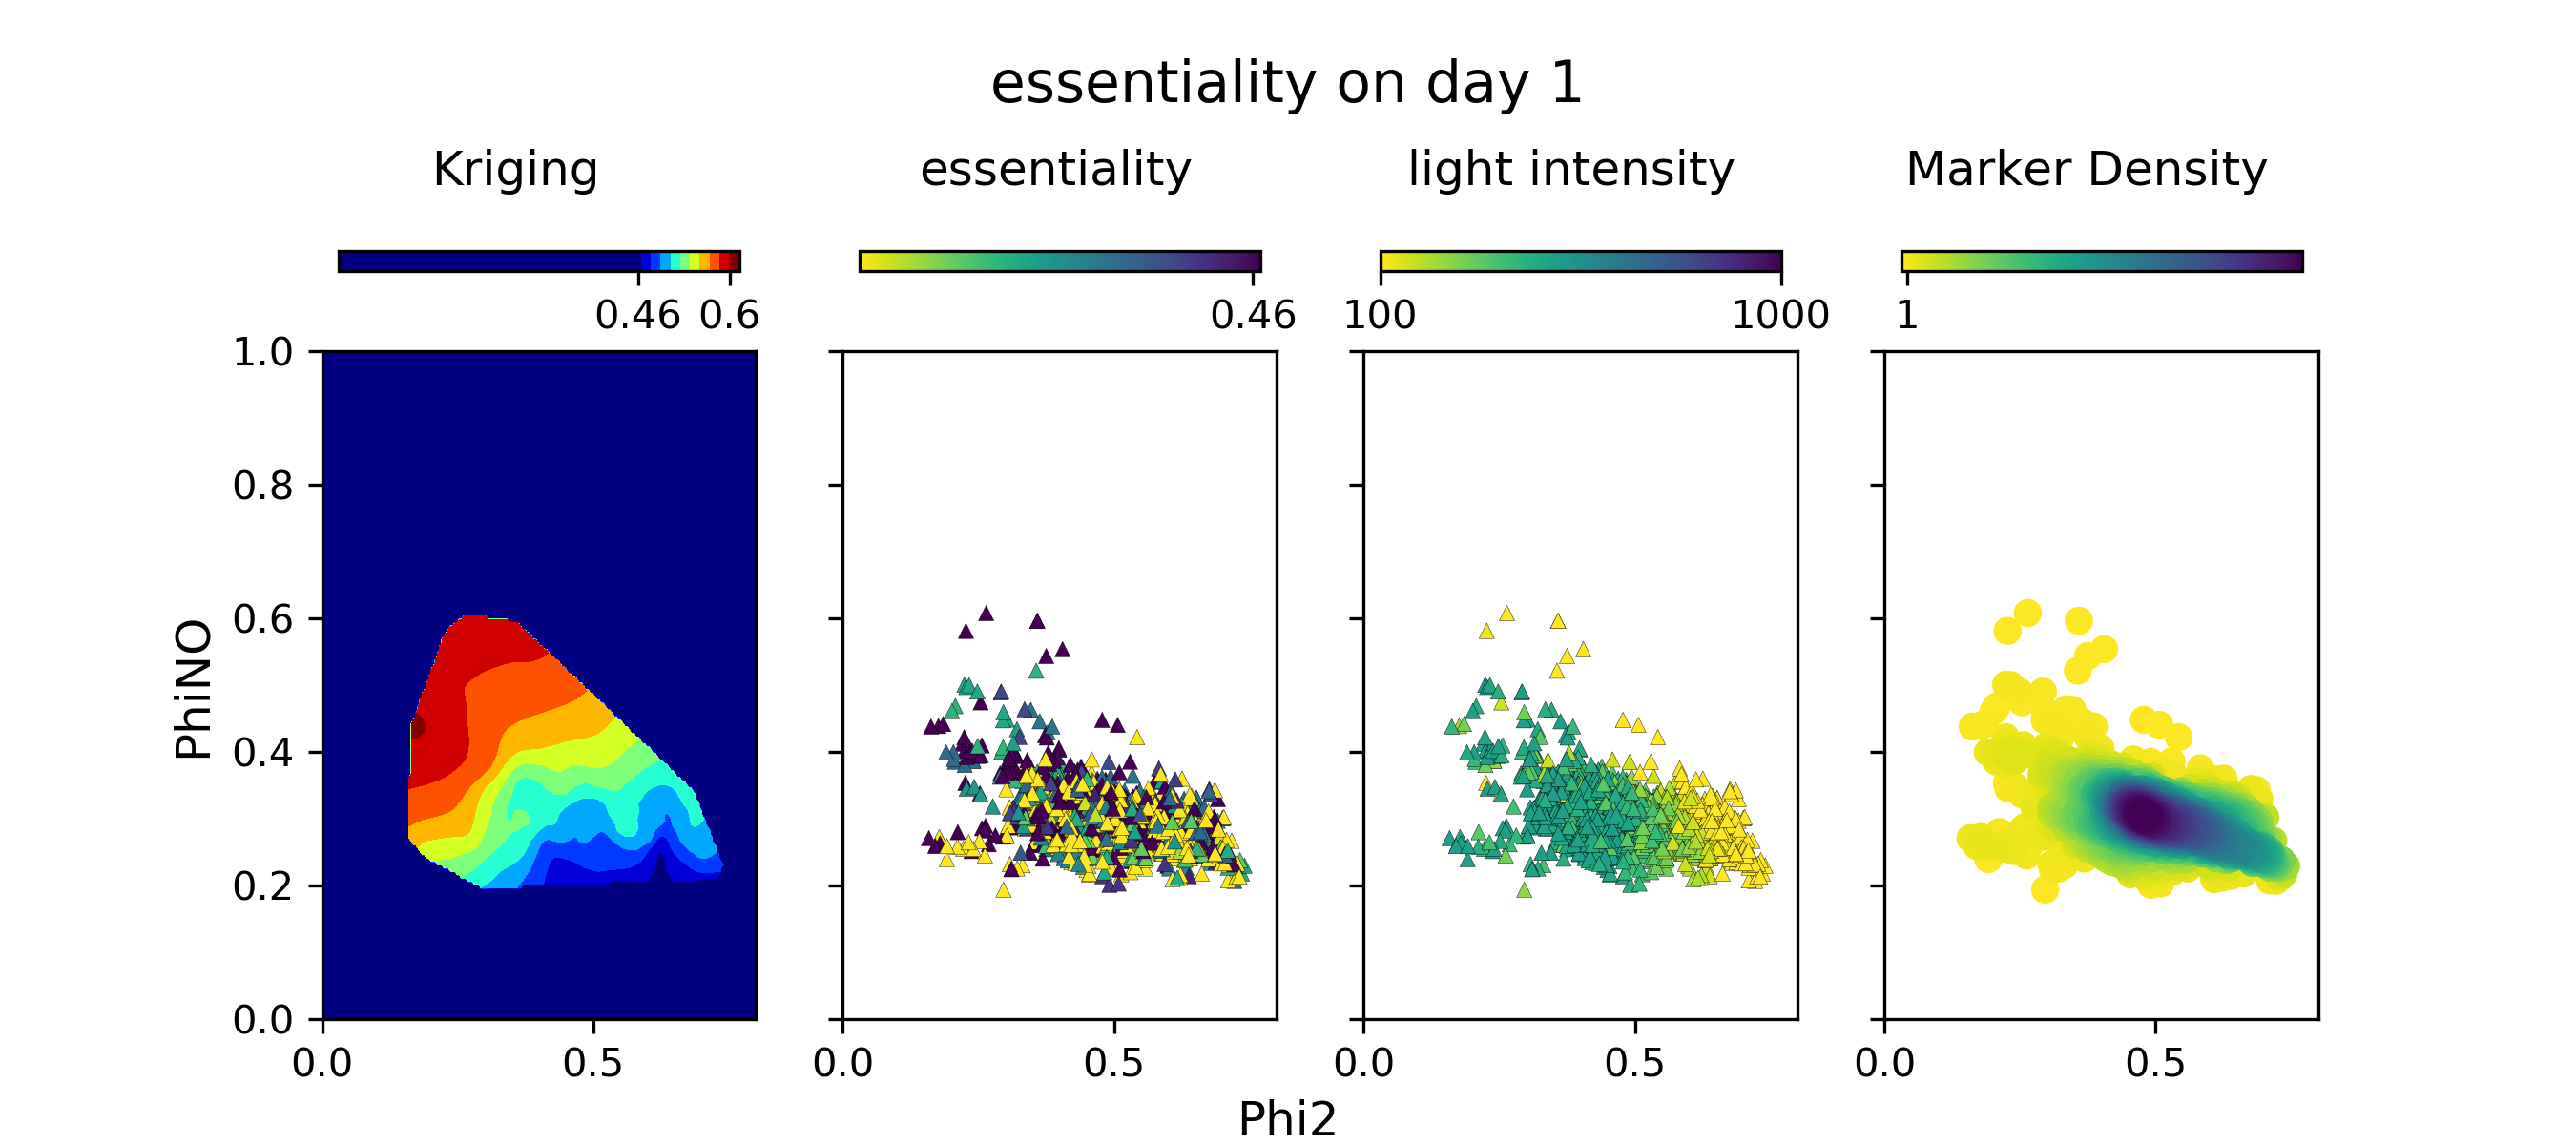

retrieving phenotypes and removing NaNs for day 1...
sampling 2000 points randomly (out of 13056 total) for day 1...
gridding the data for day 1...
runnning Kriging for day 1...
generating plot for day 1...


In [7]:
showKrigingDensityPlots( 'Phi2', 'PhiNO', 'essentiality', day_index=1, num_sample_points=2000, xmax=0.8 )

retrieving phenotypes and removing NaNs for day 1...
sampling 2000 points randomly (out of 13056 total) for day 1...
gridding the data for day 1...
runnning Kriging for day 1...


<IPython.core.display.Javascript object>


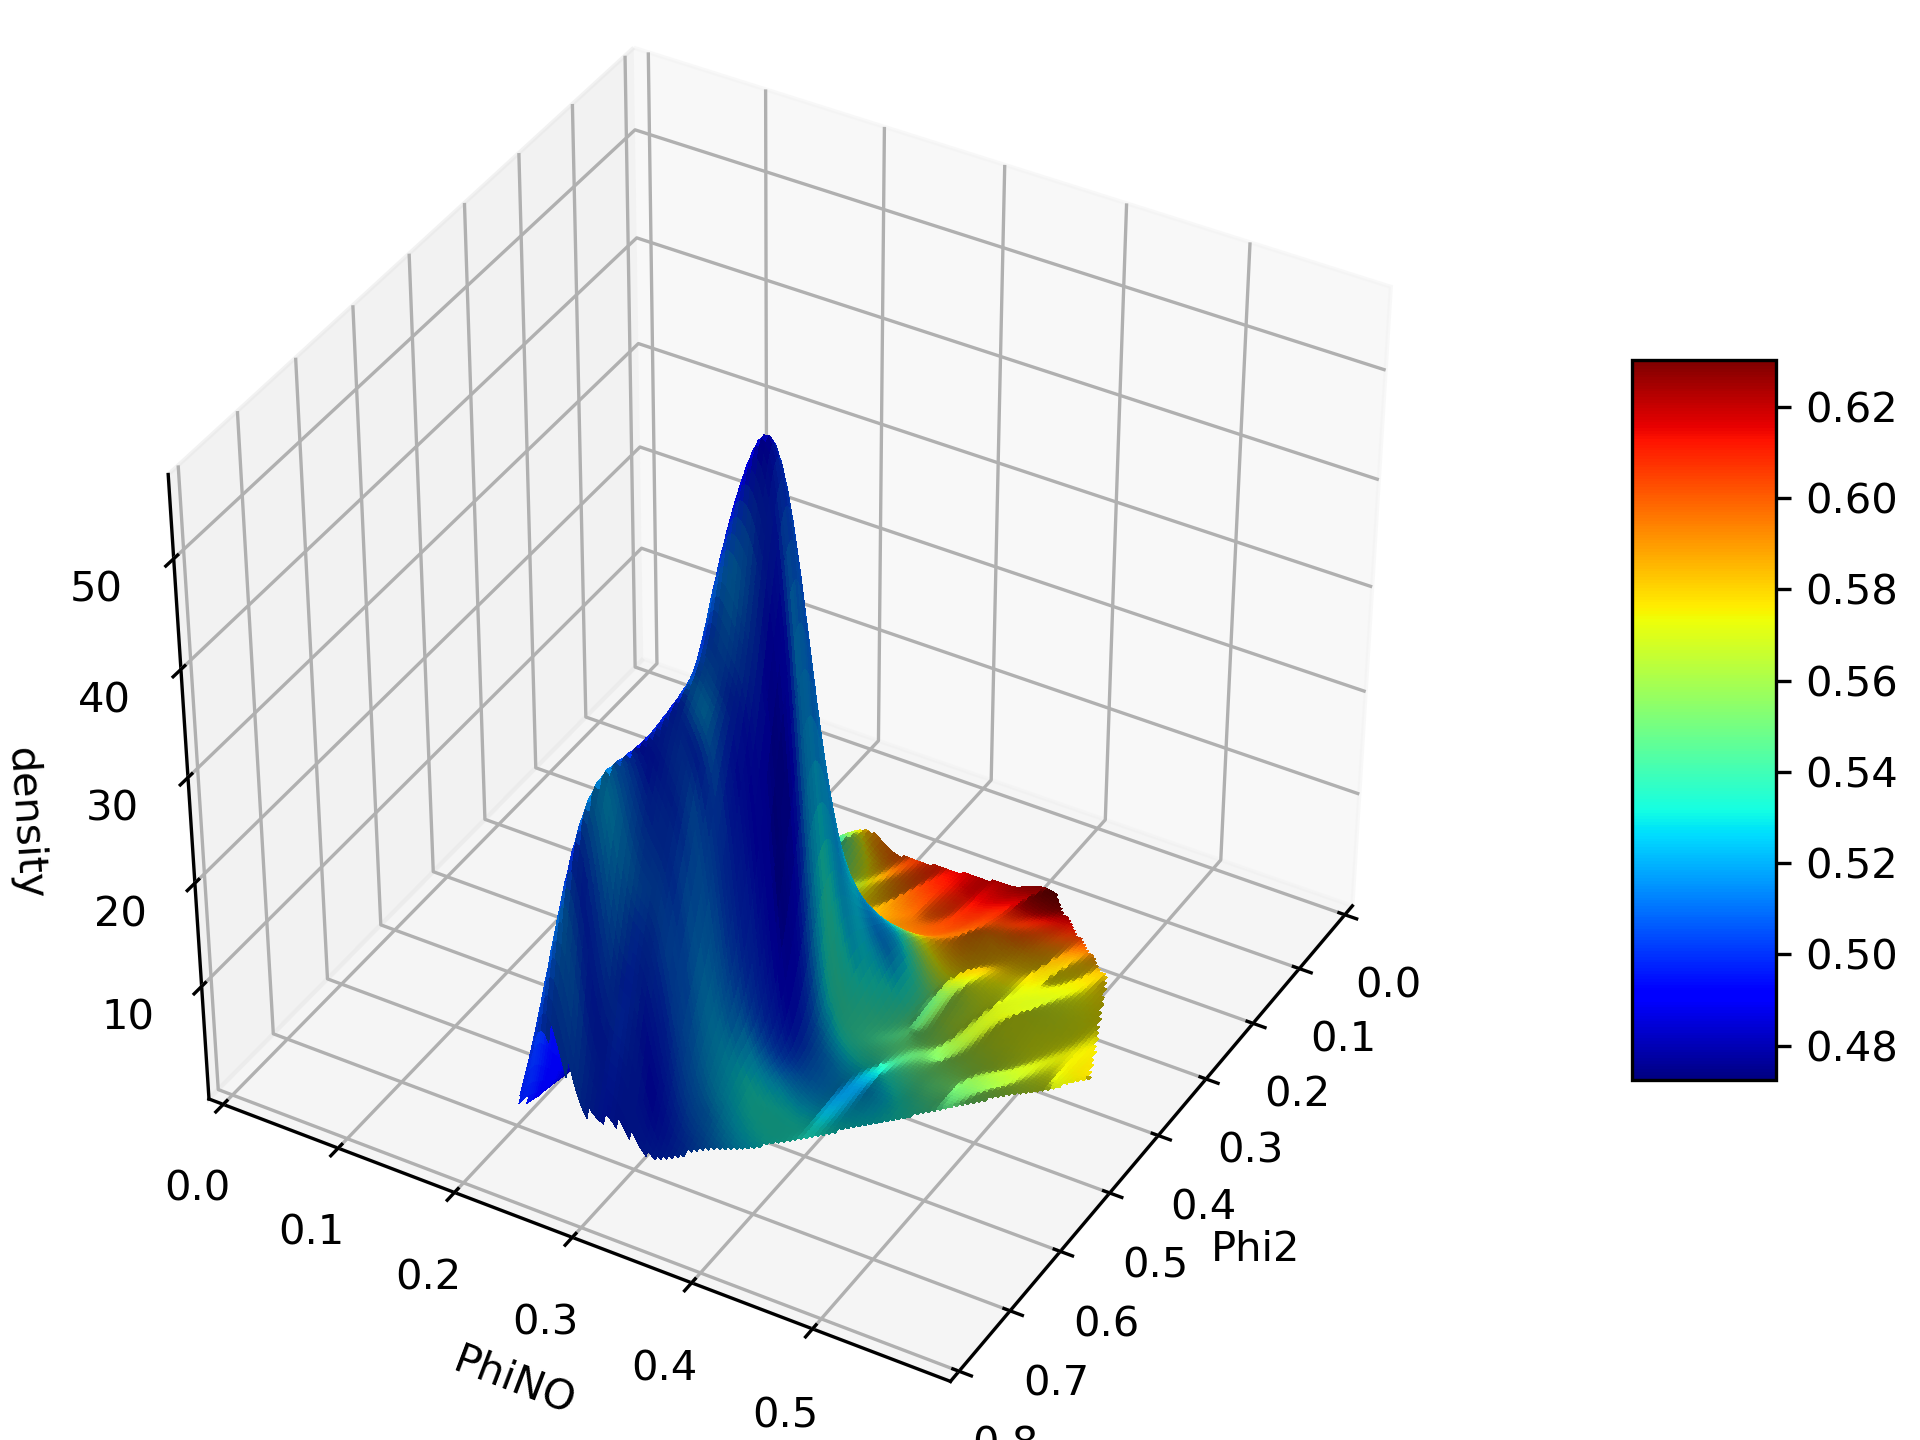

In [10]:
show3DKrigingPlot( 'Phi2', 'PhiNO', 'essentiality', day_index=1, num_sample_points=2000, xmax=0.8 , ymax=.6)

<IPython.core.display.Javascript object>


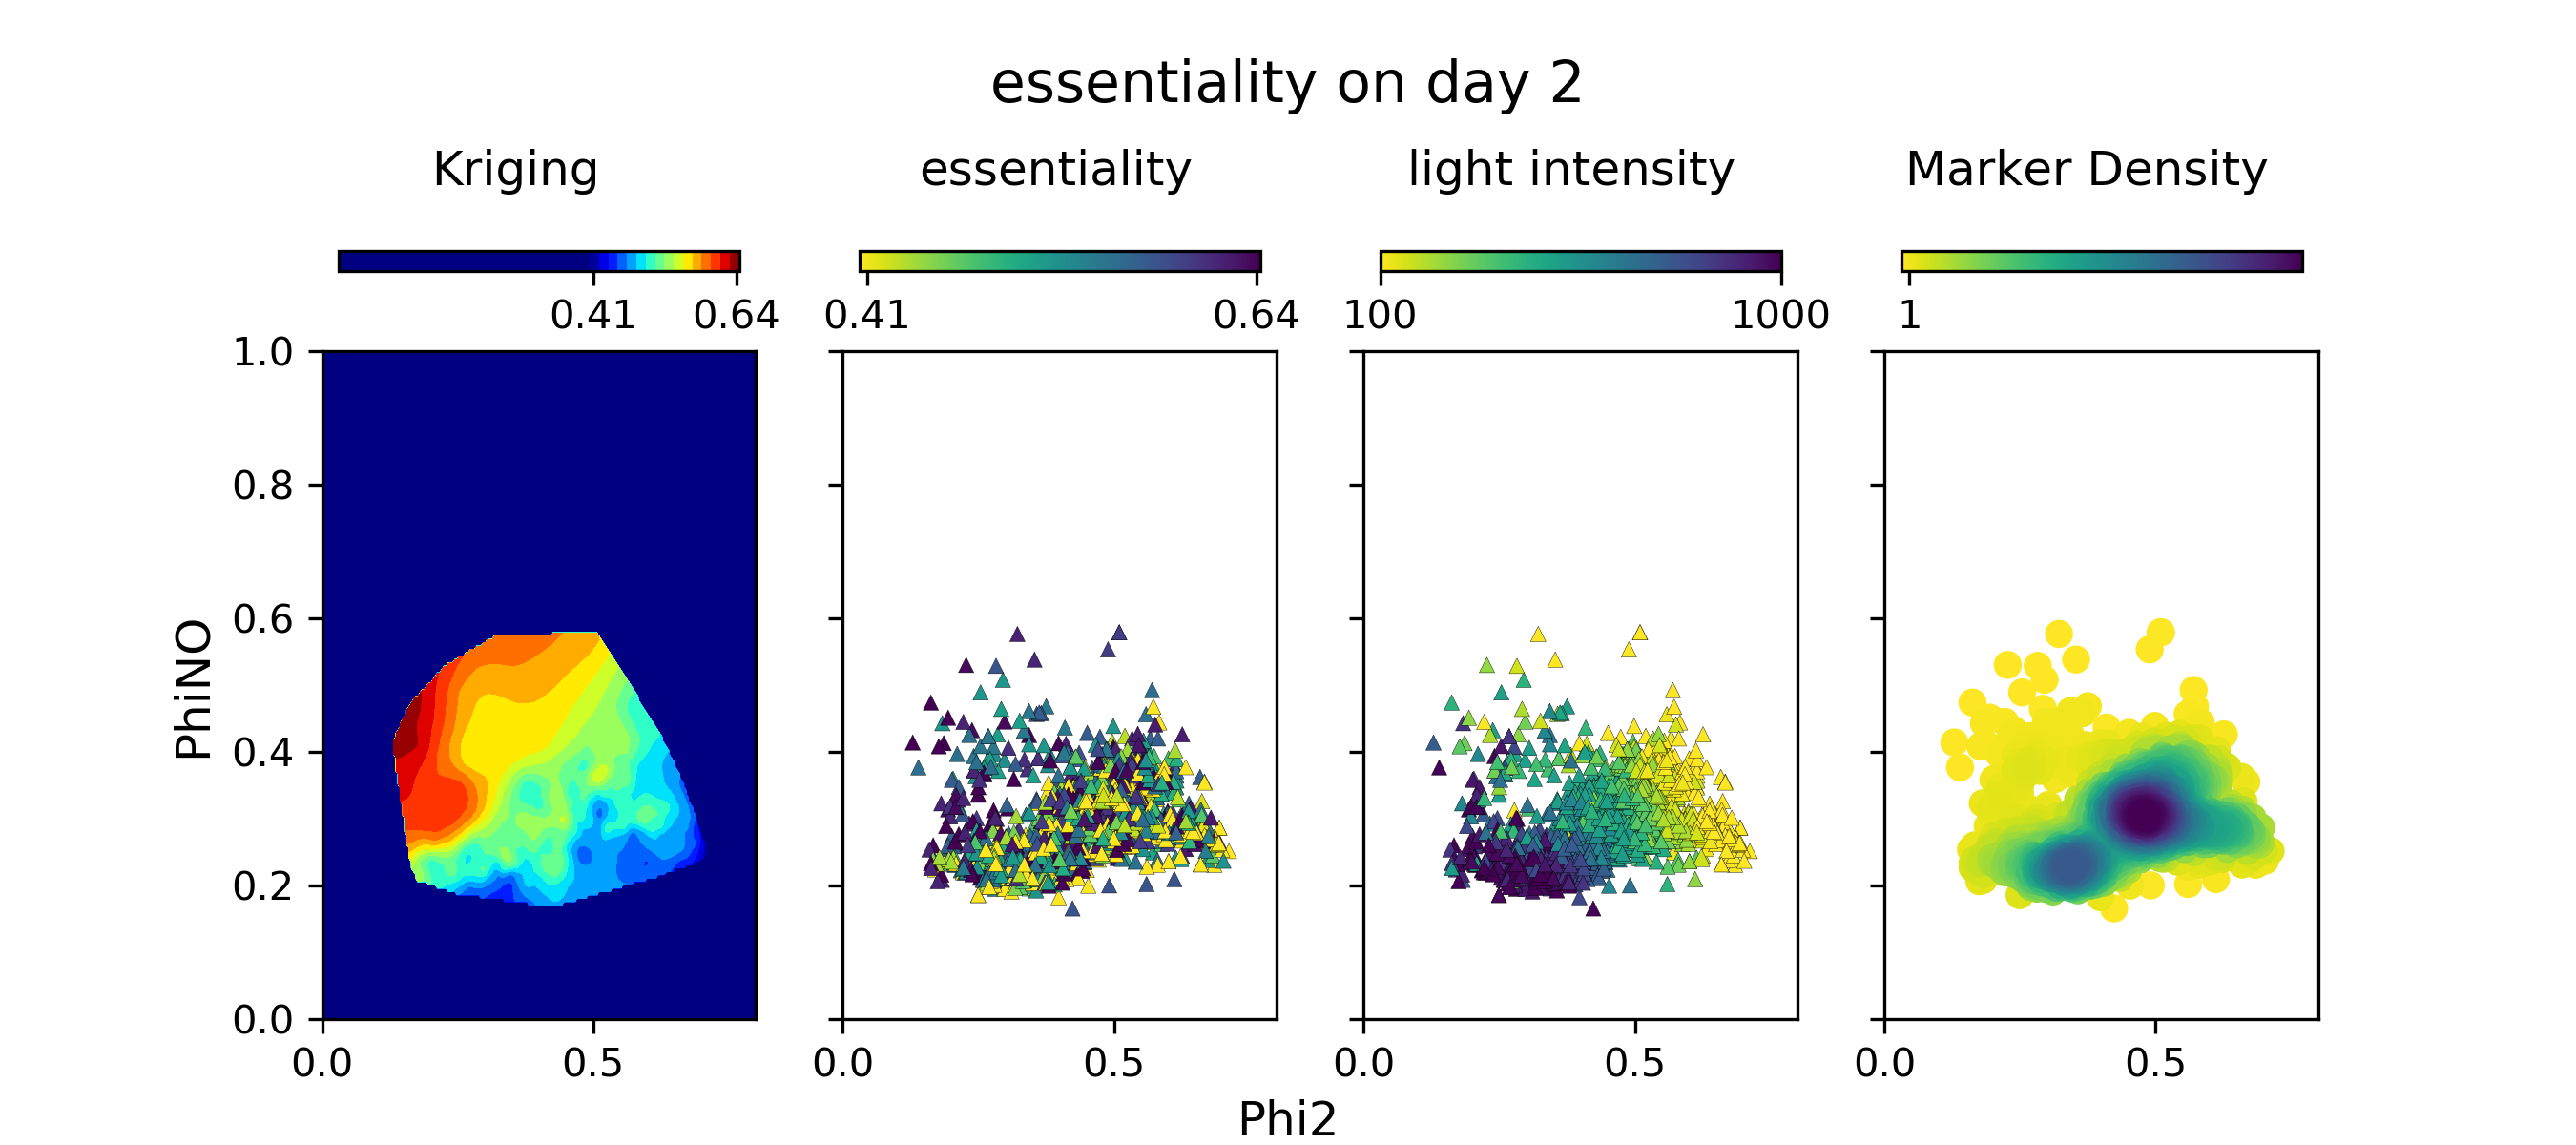

retrieving phenotypes and removing NaNs for day 2...
sampling 2000 points randomly (out of 26112 total) for day 2...
gridding the data for day 2...
runnning Kriging for day 2...
generating plot for day 2...


In [11]:
showKrigingDensityPlots( 'Phi2', 'PhiNO', 'essentiality', day_index=2, num_sample_points=2000, xmax=0.8 )

retrieving phenotypes and removing NaNs for day 2...
sampling 2000 points randomly (out of 26112 total) for day 2...
gridding the data for day 2...
runnning Kriging for day 2...


<IPython.core.display.Javascript object>


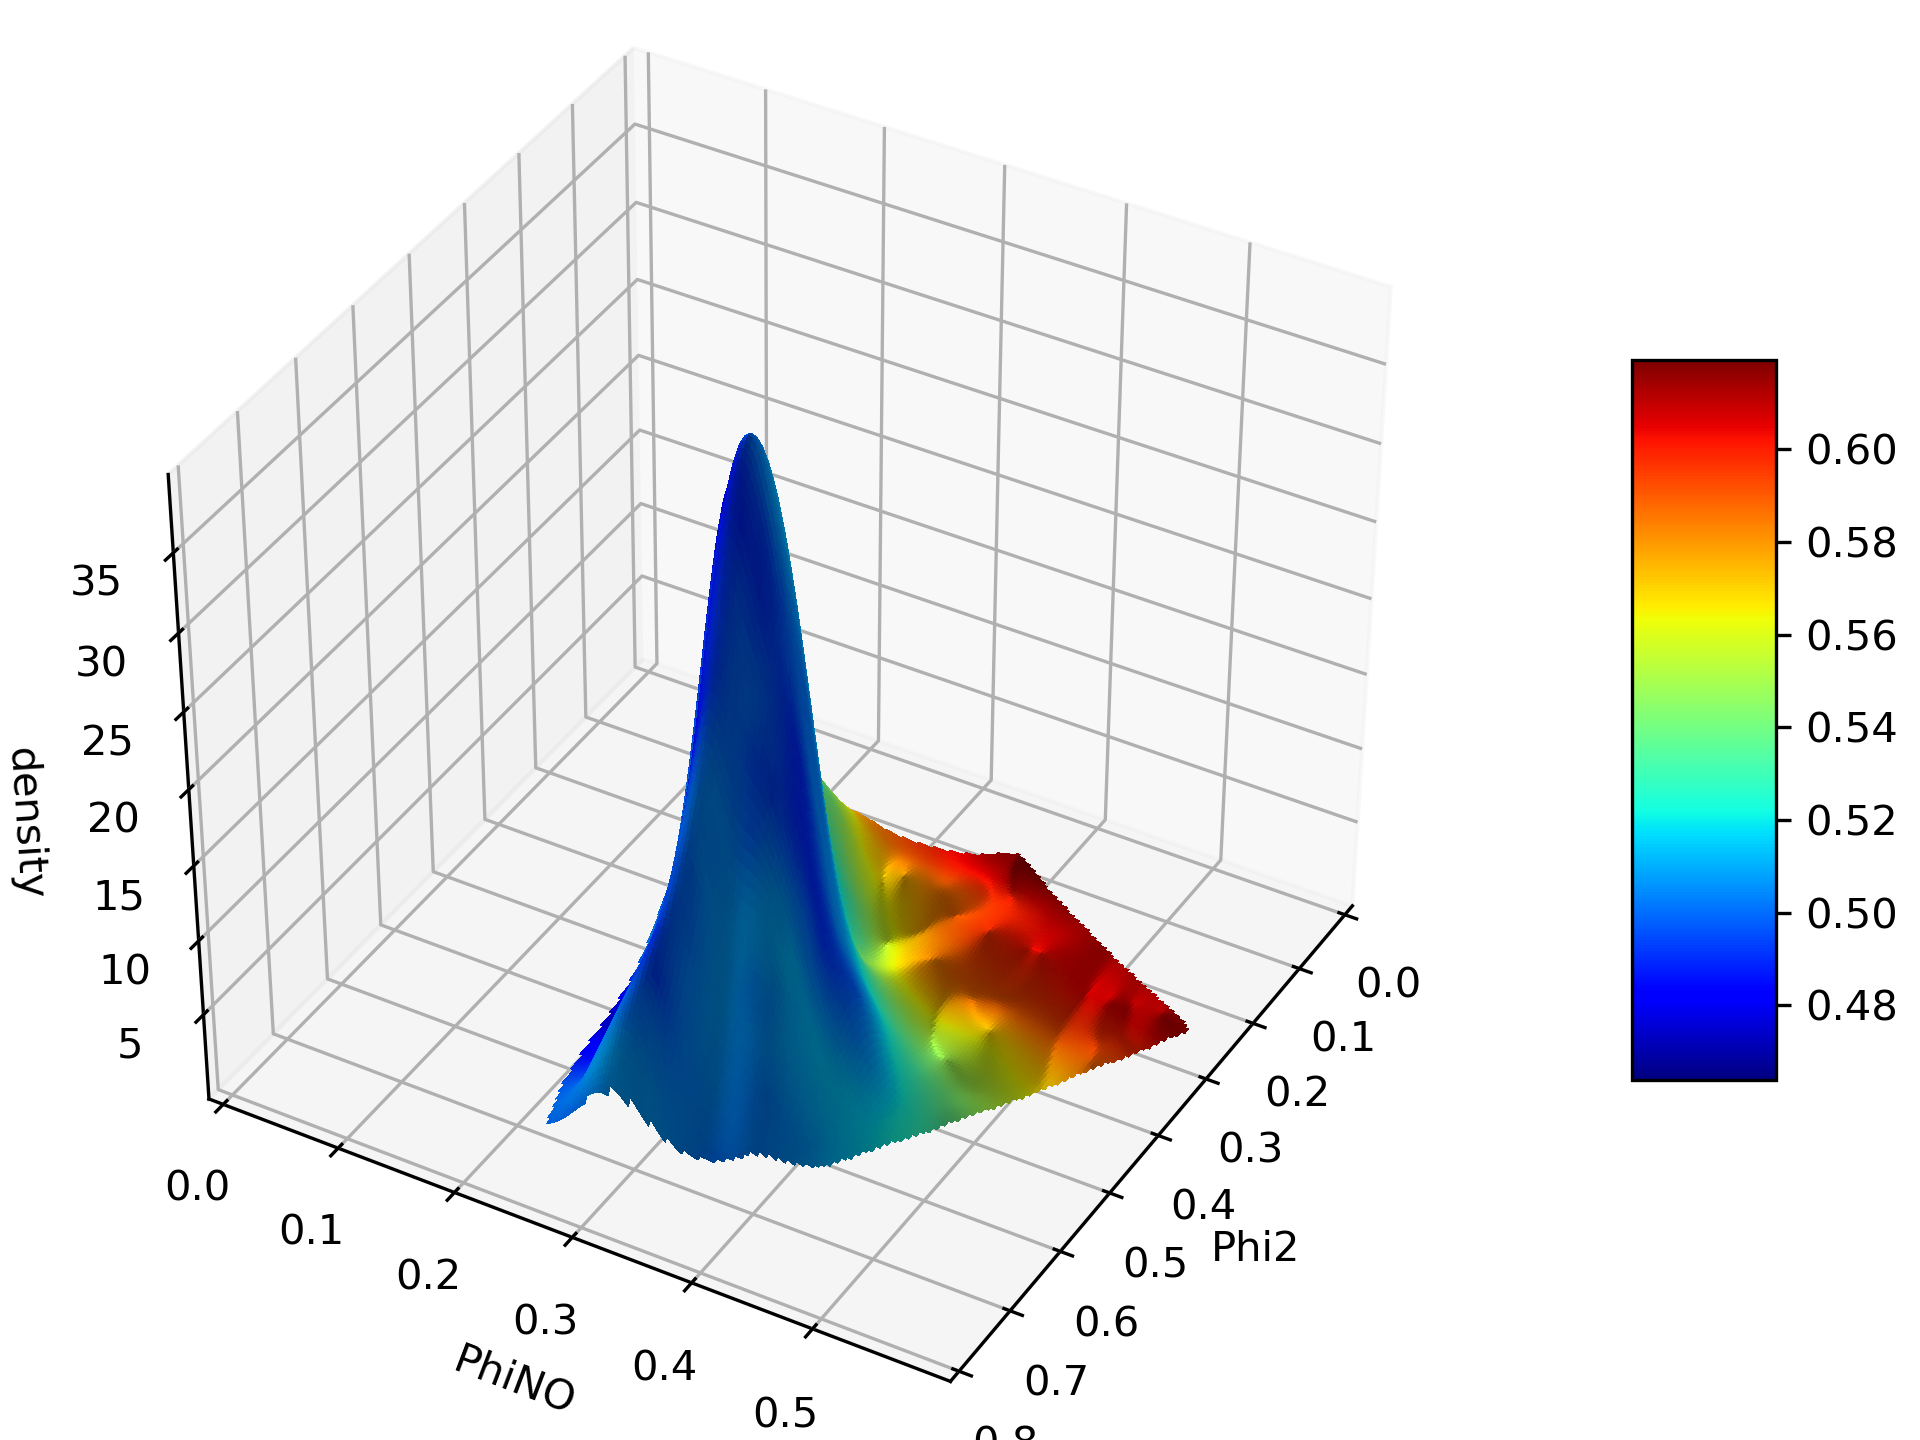

In [12]:
show3DKrigingPlot( 'Phi2', 'PhiNO', 'essentiality', day_index=2, num_sample_points=2000, xmax=0.8, ymax=0.6 )

retrieving phenotypes and removing NaNs for day 2...
sampling 2000 points randomly (out of 26112 total) for day 2...
gridding the data for day 2...
runnning Kriging for day 2...


<IPython.core.display.Javascript object>


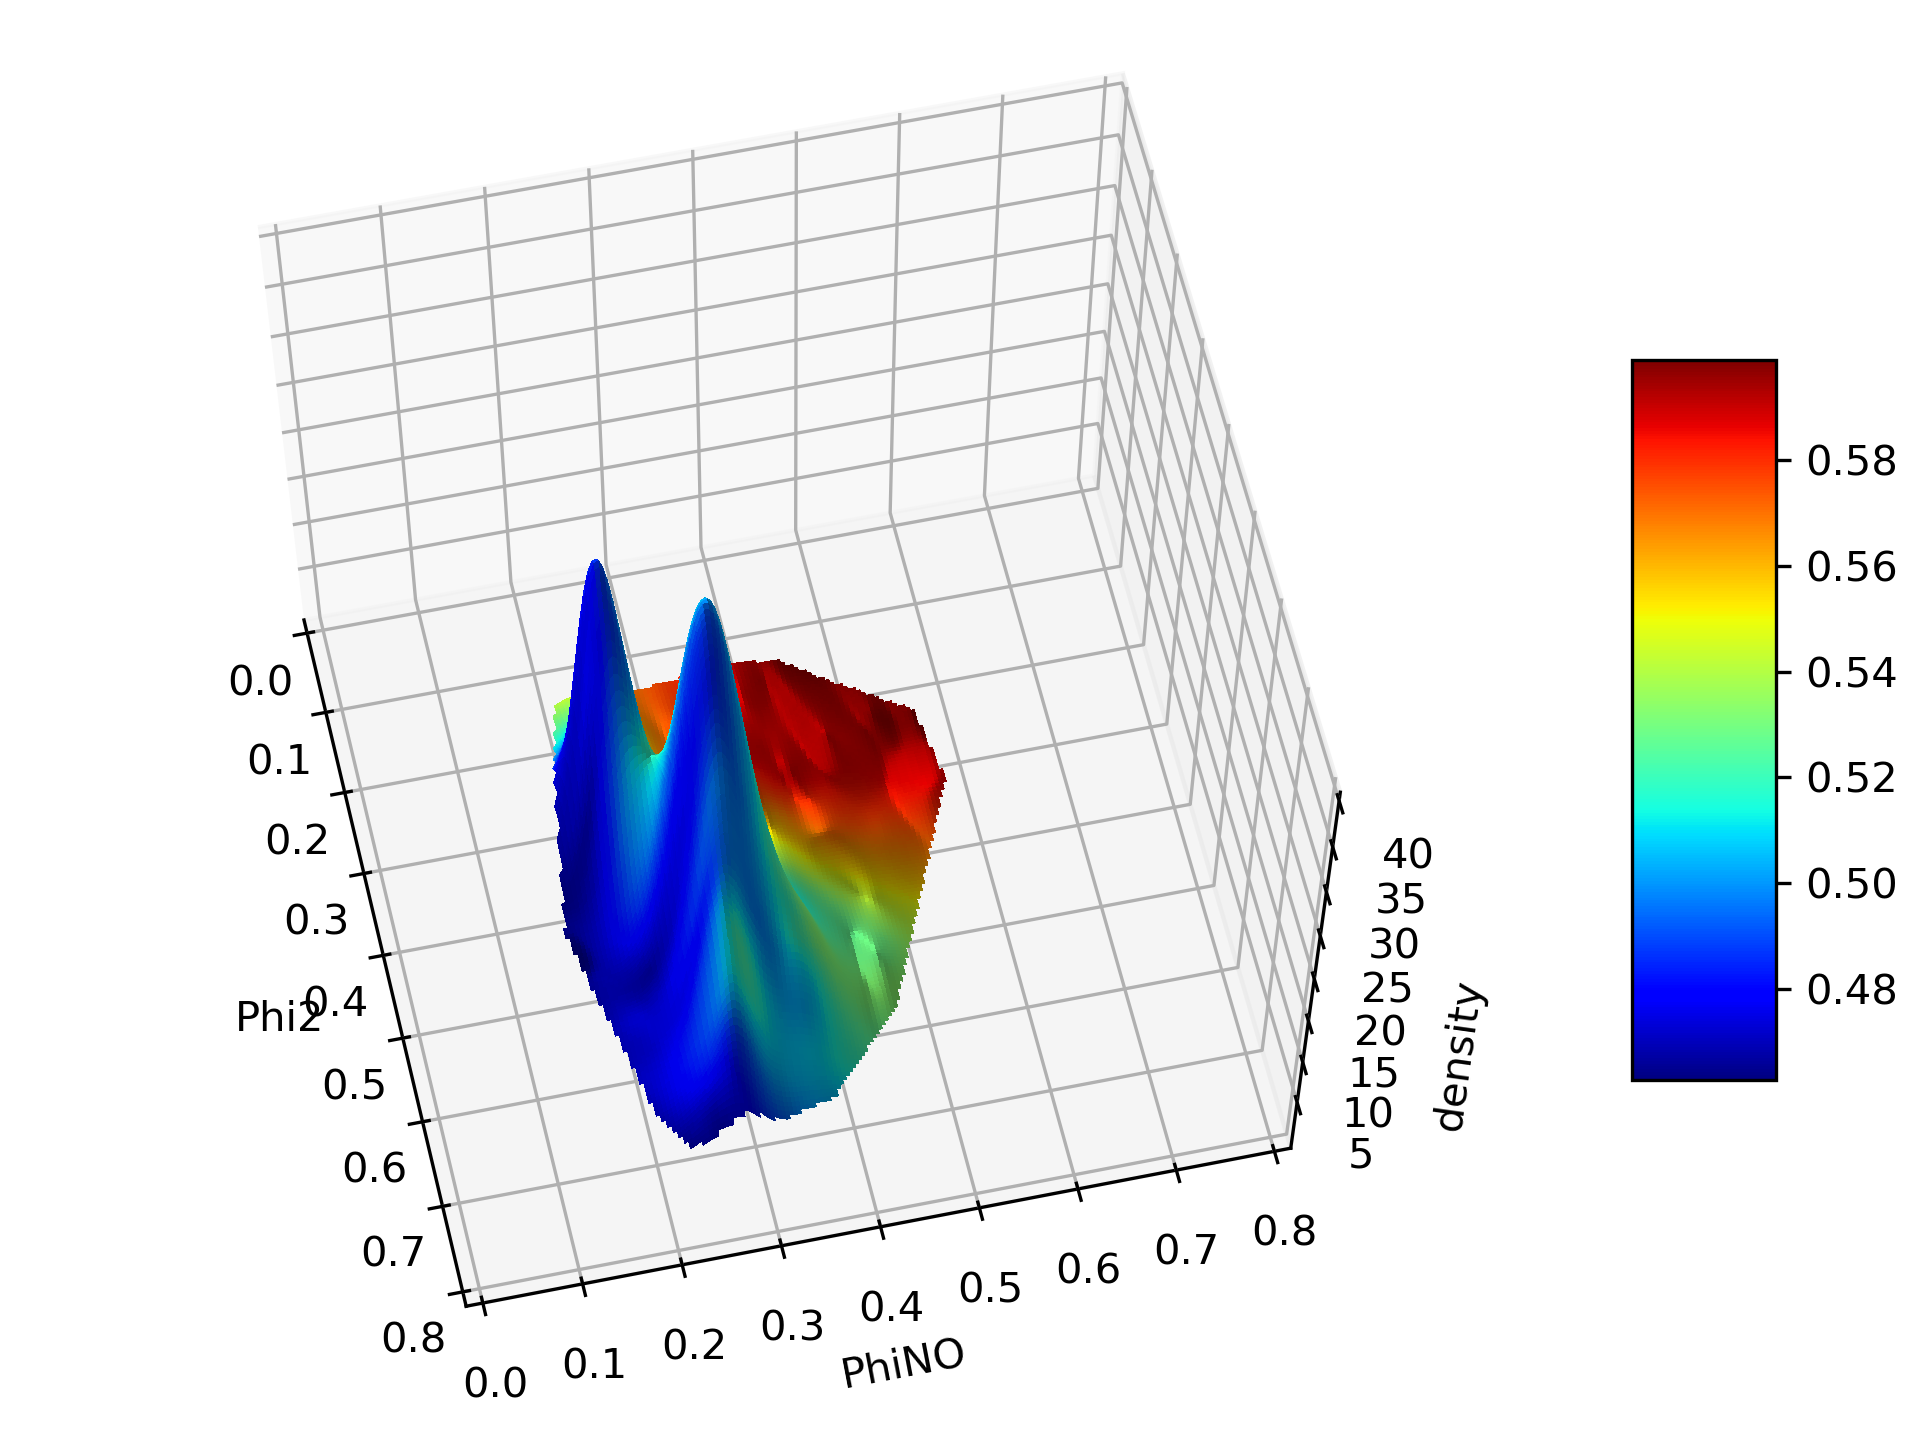

In [17]:
show3DKrigingPlot( 'Phi2', 'PhiNO', 'essentiality', day_index=2, num_sample_points=2000, xmax=0.8, ymax=.8 )

retrieving phenotypes and removing NaNs for day 2...
sampling 2000 points randomly (out of 26048 total) for day 2...
gridding the data for day 2...
runnning Kriging for day 2...


<IPython.core.display.Javascript object>


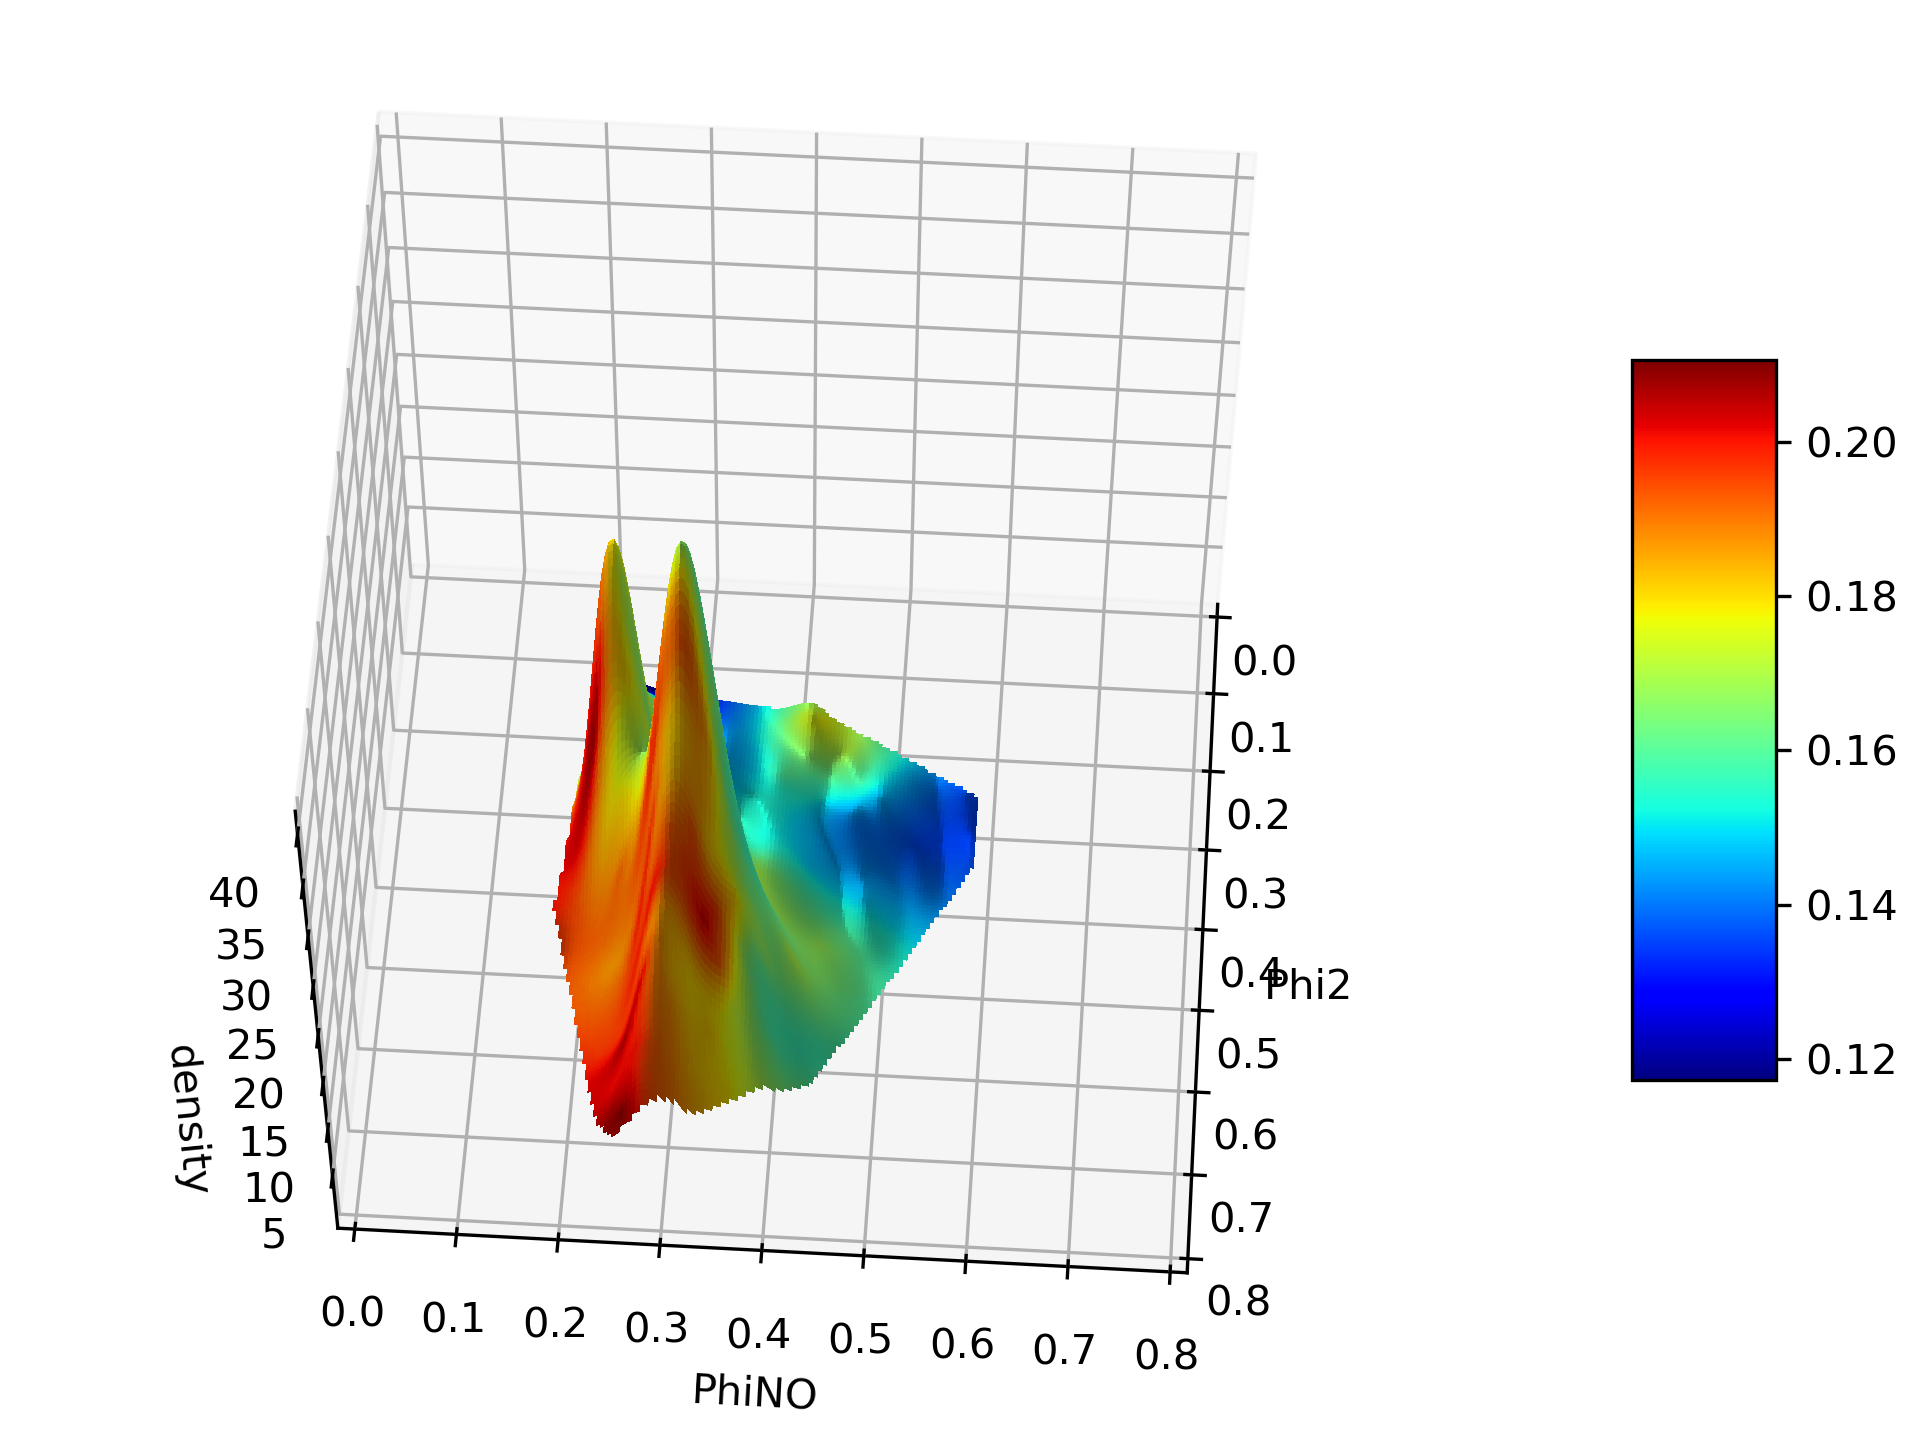

In [23]:
show3DKrigingPlot( 'Phi2', 'PhiNO', 'kaks_median', day_index=2, num_sample_points=2000, xmax=0.8, ymax=.8 )

retrieving phenotypes and removing NaNs for day 2...
sampling 2000 points randomly (out of 26048 total) for day 2...
gridding the data for day 2...
runnning Kriging for day 2...


<IPython.core.display.Javascript object>


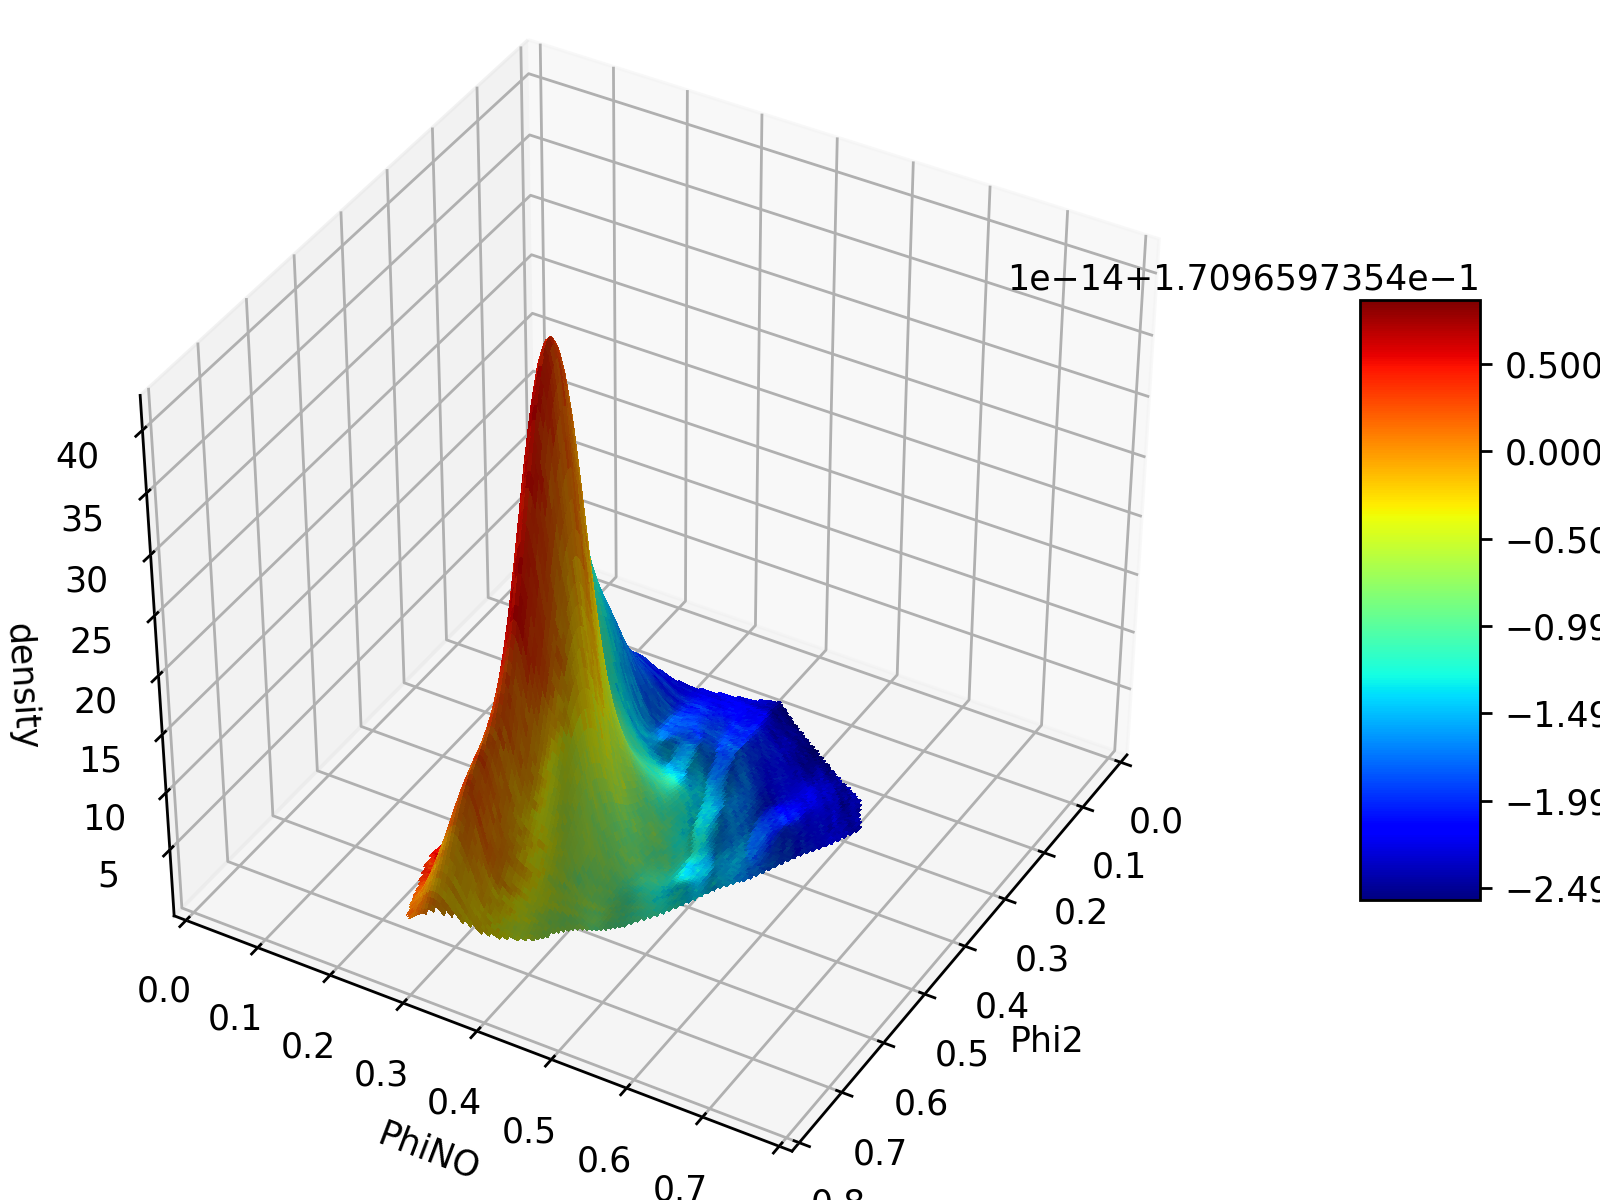

In [26]:

show3DKrigingPlot( 'Phi2', 'PhiNO', 'kaks_median', day_index=2, num_sample_points=2000, xmax=0.8, ymax=.8 )


<IPython.core.display.Javascript object>


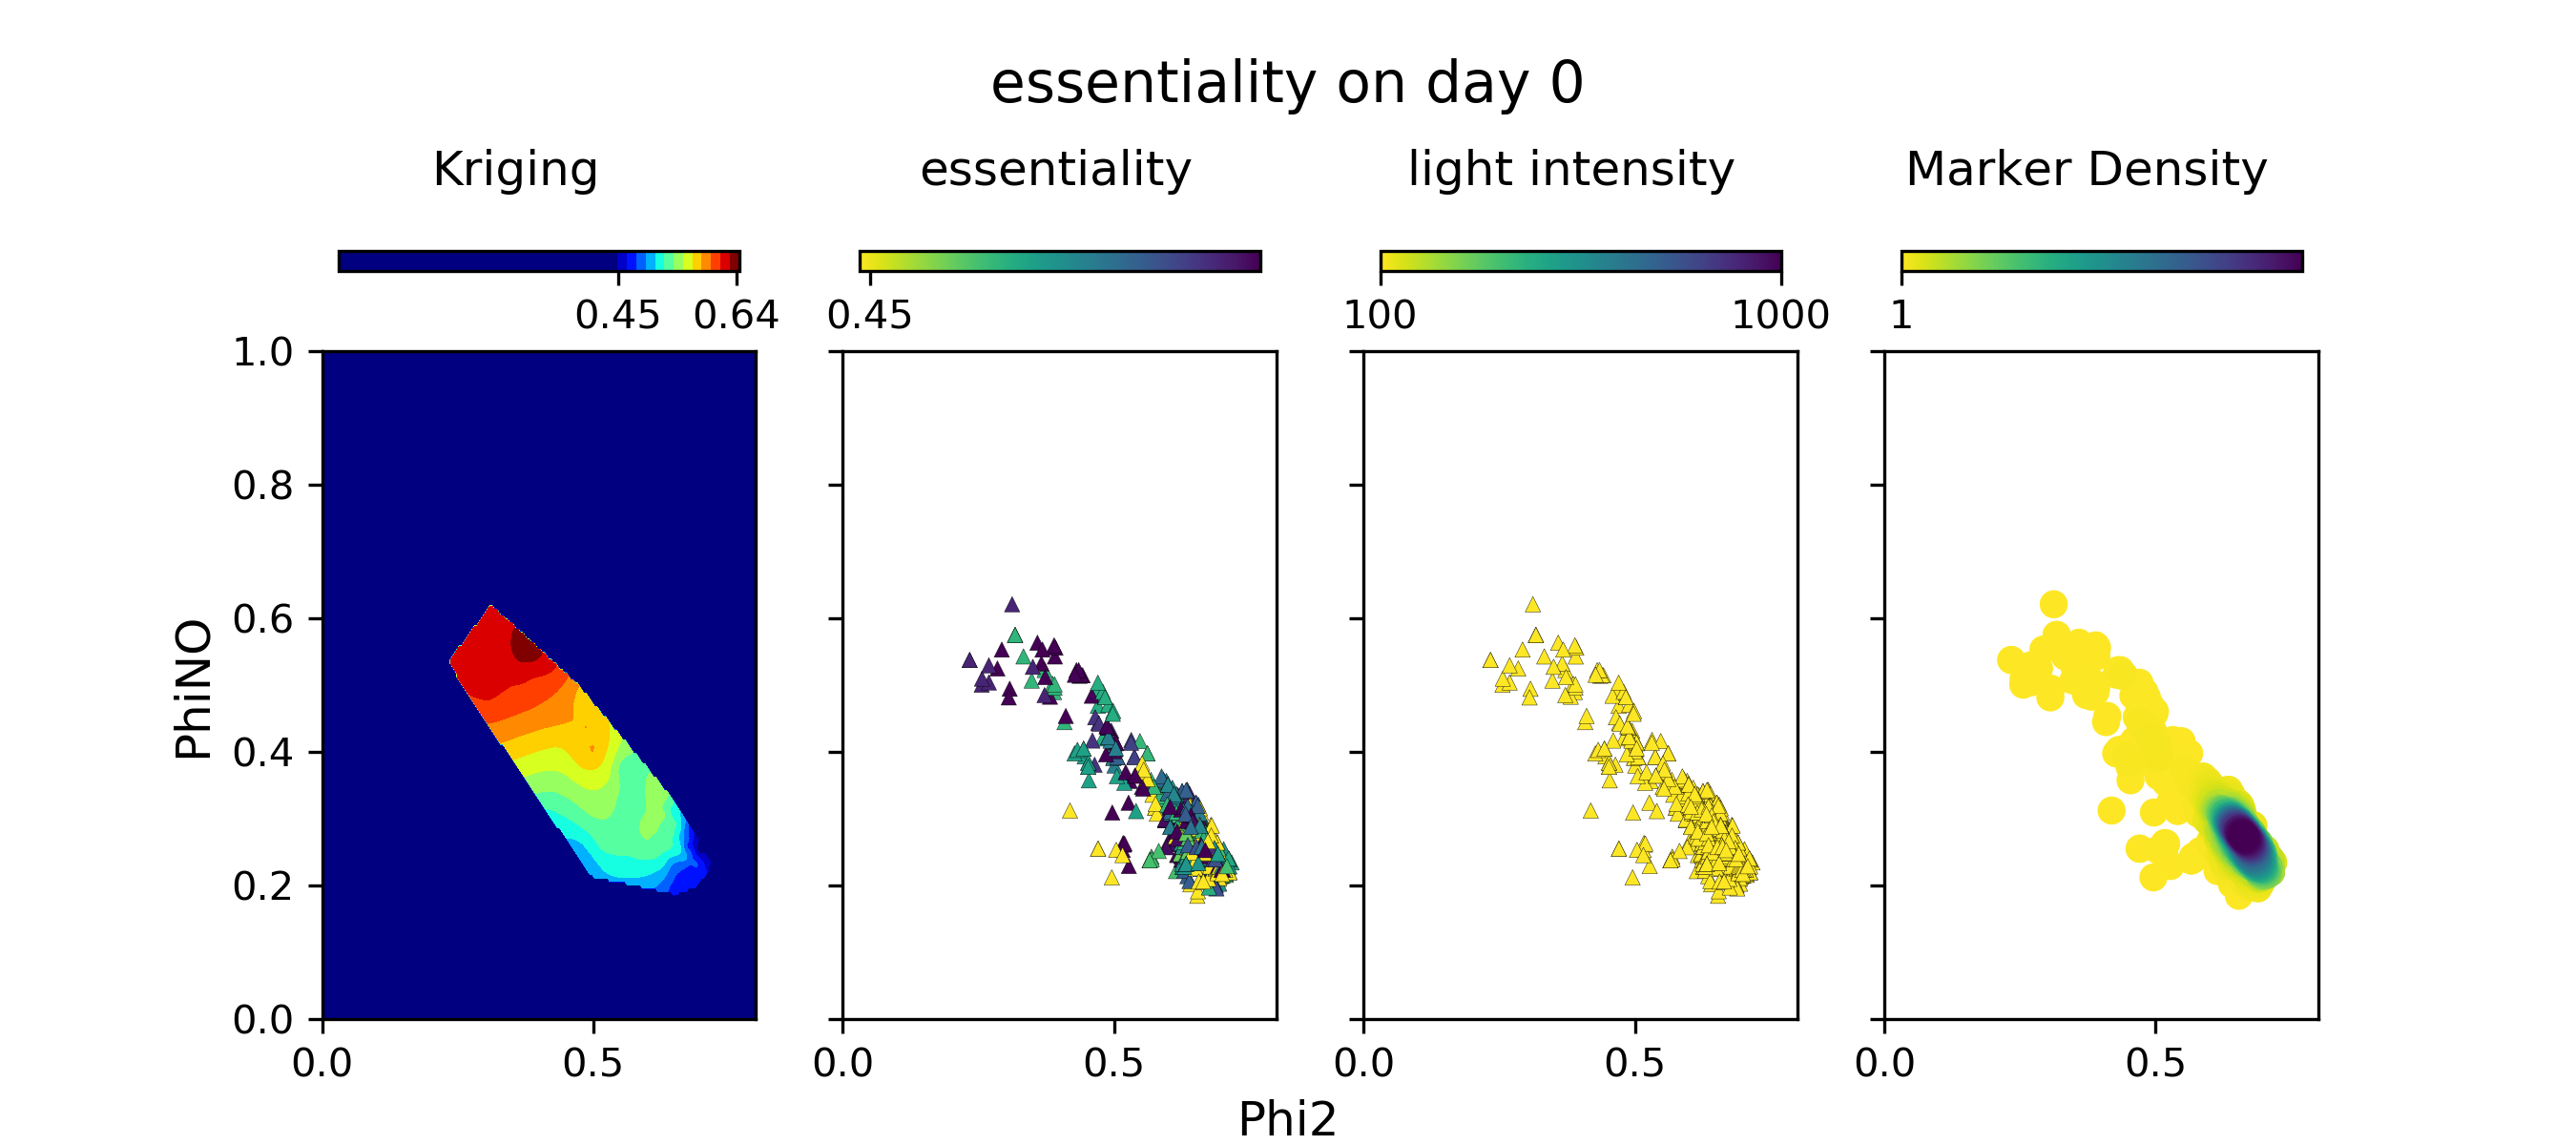

retrieving phenotypes and removing NaNs for day 0...
sampling 2000 points randomly (out of 6528 total) for day 0...
gridding the data for day 0...
runnning Kriging for day 0...
generating plot for day 0...


In [22]:
showKrigingDensityPlots( 'Phi2', 'PhiNO', 'essentiality', day_index=0, num_sample_points=2000, xmax=0.8 )

retrieving phenotypes and removing NaNs for day 0...
sampling 2000 points randomly (out of 6528 total) for day 0...
gridding the data for day 0...
runnning Kriging for day 0...


<IPython.core.display.Javascript object>


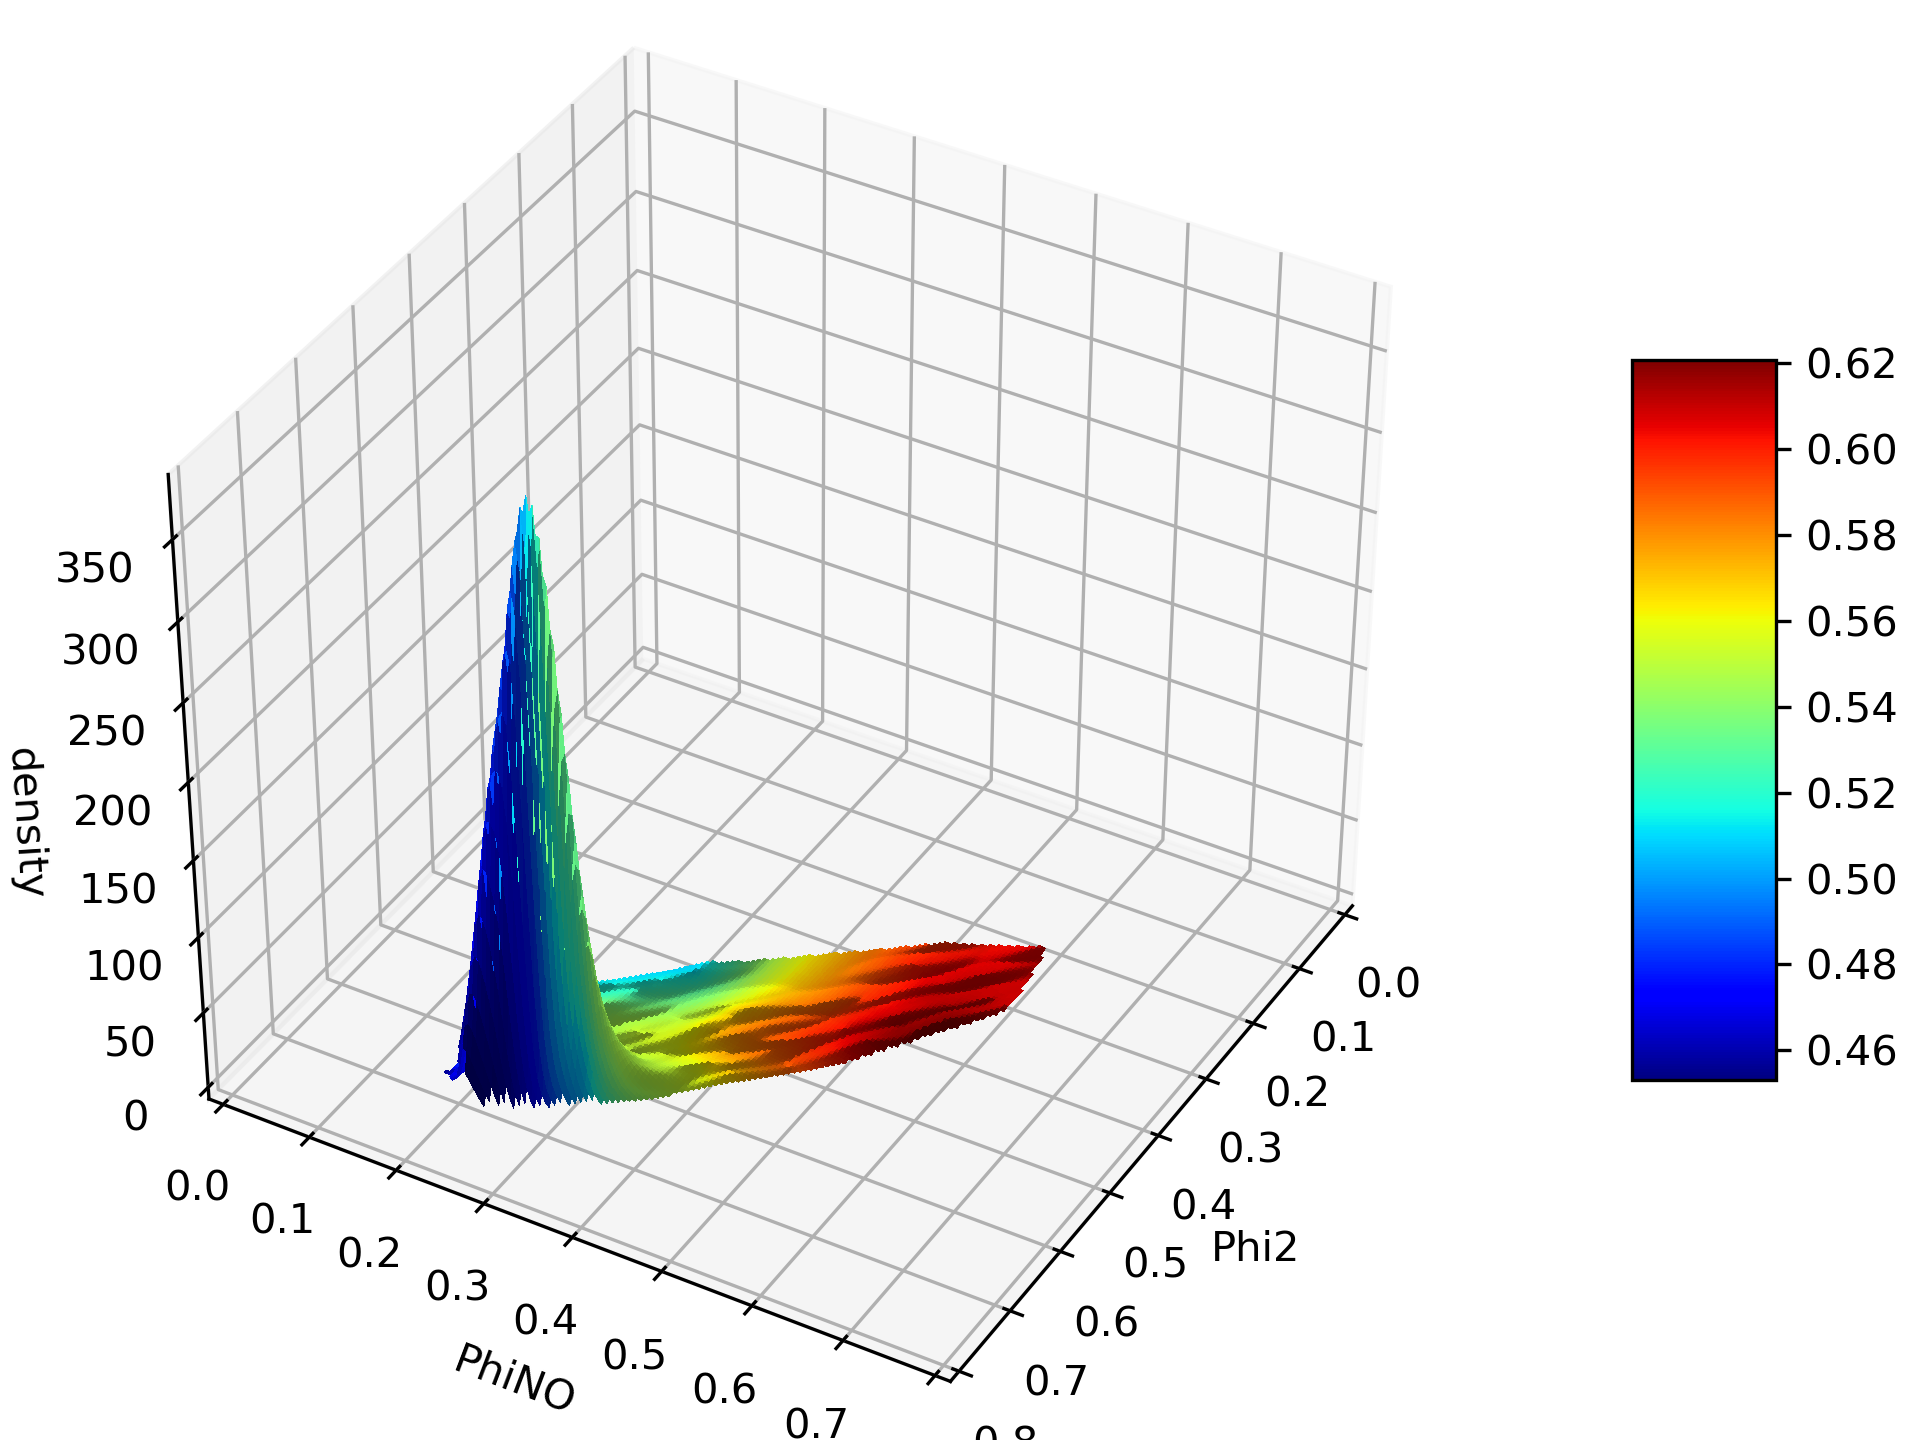

In [16]:
show3DKrigingPlot( 'Phi2', 'PhiNO', 'essentiality', day_index=0, num_sample_points=2000, xmax=0.8, ymax=.8 )

In [98]:
mutant_avg_filtered_dataframes['Size']

[8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 32.0,
 32.5,
 33.0,
 33.5,
 34.0,
 34.5,
 35.0,
 35.5,
 36.0,
 36.5,
 37.0,
 37.5,
 38.0,
 38.5,
 39.0,
 39.5,
 40.0,
 40.5,
 41.0,
 41.5,
 42.0,
 42.5,
 43.0,
 43.5,
 44.0,
 44.5,
 45.0,
 45.5,
 46.0,
 46.5,
 47.0,
 47.5,
 56.0,
 56.1667,
 56.5,
 56.6667,
 57.0,
 57.1667,
 57.5,
 57.6667,
 58.0,
 58.1667,
 58.5,
 58.6667,
 59.0,
 59.1667,
 59.5,
 59.6667,
 60.0,
 60.1667,
 60.5,
 60.6667,
 61.0,
 61.1667,
 61.5,
 61.6667,
 62.0,
 62.1667,
 62.5,
 62.6667,
 63.0,
 63.1667,
 63.5,
 63.6667,
 64.0,
 64.1667,
 64.5,
 64.6667,
 65.0,
 65.1667,
 65.5,
 65.6667,
 66.0,
 66.1667,
 66.5,
 66.6667,
 67.0,
 67.1667,
 67.5,
 67.6667,
 68.0,
 68.1667,
 68.5,
 68.6667,
 69.0,
 69.1667,
 69.5,
 69.6667,
 70.0,
 70.1667,
 70.5,
 70.6667,
 71.0,
 71.1667,
 71.5,
 71.6667,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0003,
 93.0,
 94.0003,
 95.0,
 104

<IPython.core.display.Javascript object>


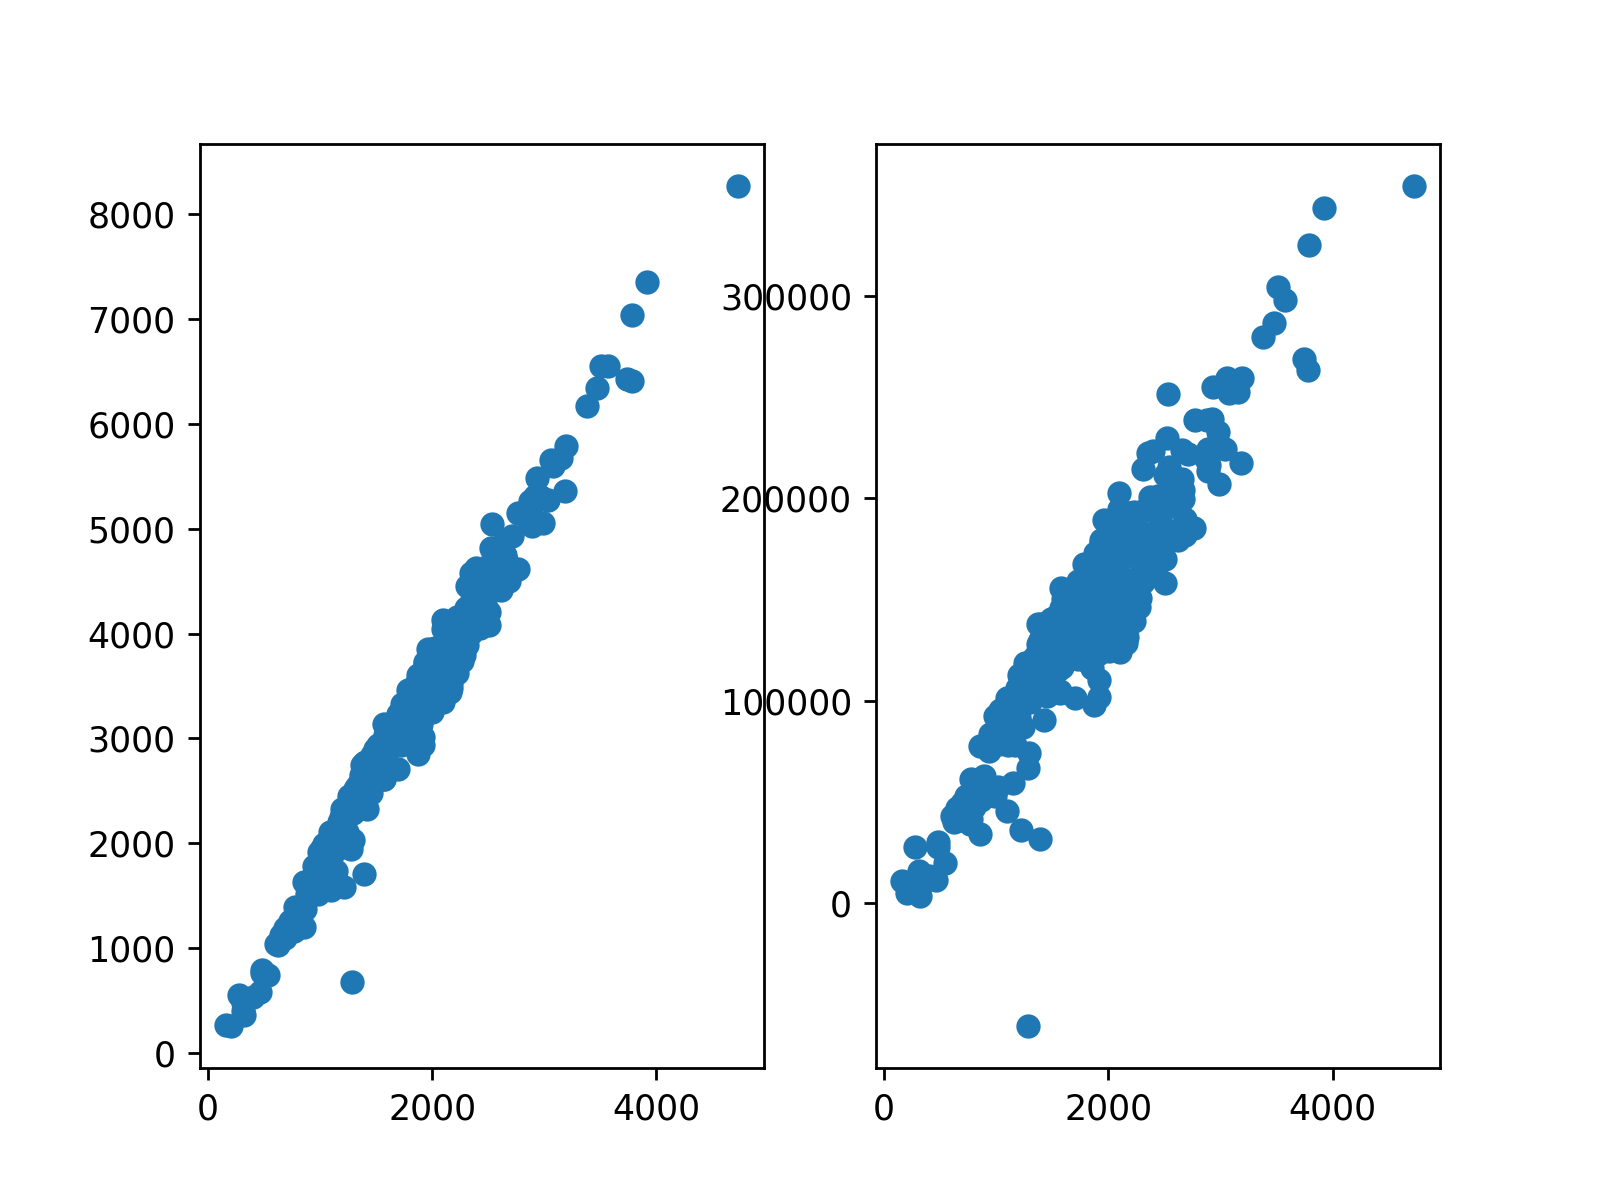

In [100]:
#dataframes['metadata']['total_absolute_growth']
#dataframes['metadata']['one_thru_two_absolute_growth']=dataframes['Size'][47.5]-dataframes['Size'][8]

b=np.array(mutant_avg_filtered_dataframes['Size'][80]) #[71.666700000000006])

a=np.array(mutant_avg_filtered_dataframes['Size'][8])
diff=100*(b-a)
rel_diff=diff/a

mutant_avg_filtered_dataframes['metadata']['one_thru_three_relative_growth']=rel_diff
mutant_avg_filtered_dataframes['metadata']['one_thru_three_absolute_growth']=diff

#mutant_avg_filtered_dataframes['metadata']['one_thru_three_relative_growth']=100*mutant_avg_filtered_dataframes['metadata']['essentiality']

#list(dataframes['Size'].keys())

#dataframes['Size'][71.666700000000006]
fig=plt.figure()
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.scatter(a,b)
ax2.scatter(a,diff)
plt.show()


retrieving phenotypes and removing NaNs for day 2...
sampling 2000 points randomly (out of 25792 total) for day 2...
gridding the data for day 2...
runnning Kriging for day 2...


<IPython.core.display.Javascript object>


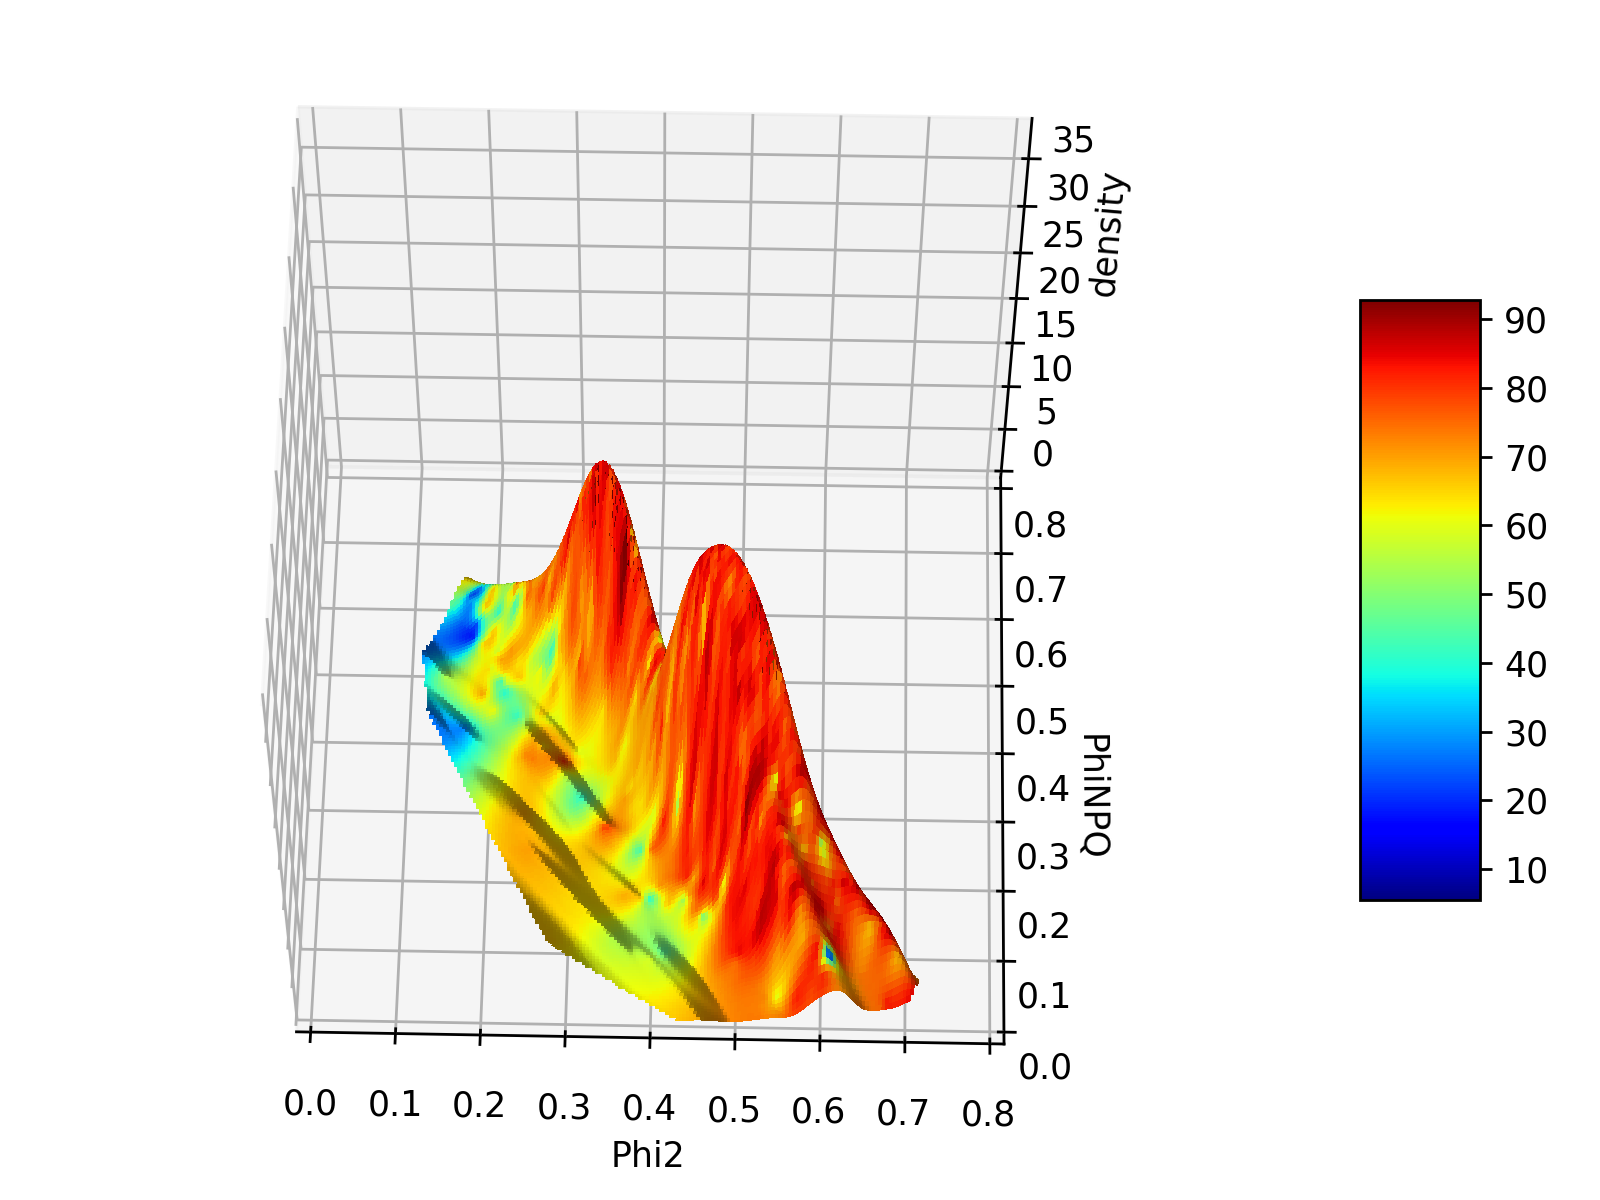

In [101]:
show3DKrigingPlot( 'Phi2', 'PhiNPQ', 'one_thru_three_relative_growth', day_index=2, num_sample_points=2000, xmax=0.8, ymax=.8 )

In [55]:
mutant_avg_filtered_dataframes['metadata']['one_thru_three_relative_growth']

mutant
5-FCL KO               0.521978
CR88                   0.597251
FLAG_058F09            0.743175
FLAG_364B02            0.698868
GABI_023D06            0.598246
GABI_087H06            0.726615
GABI_104F01            0.725484
GABI_143D01            0.566751
GABI_147F12            0.657298
GABI_161D12            0.639590
GABI_266G06            0.735352
GABI_380D10            0.628363
GABI_381H10            0.088785
Npq7                   0.568296
PGM                    0.600729
SAIL_101_G12           0.753420
SAIL_104_H07           0.173190
SAIL_113_B12           0.661814
SAIL_1146_E01          0.635526
SAIL_1147_G02          0.569421
SAIL_115_E08           0.552234
SAIL_1240_C05          0.722522
SAIL_1250_C12          0.801427
SAIL_1255_C06          0.569658
SAIL_1260_A03          0.696539
SAIL_1284_E04          0.673092
SAIL_1288_E07          0.686561
SAIL_1291_F03          0.602461
SAIL_154_E03           0.721965
SAIL_177_G11           0.571687
                         ...   
W

<IPython.core.display.Javascript object>


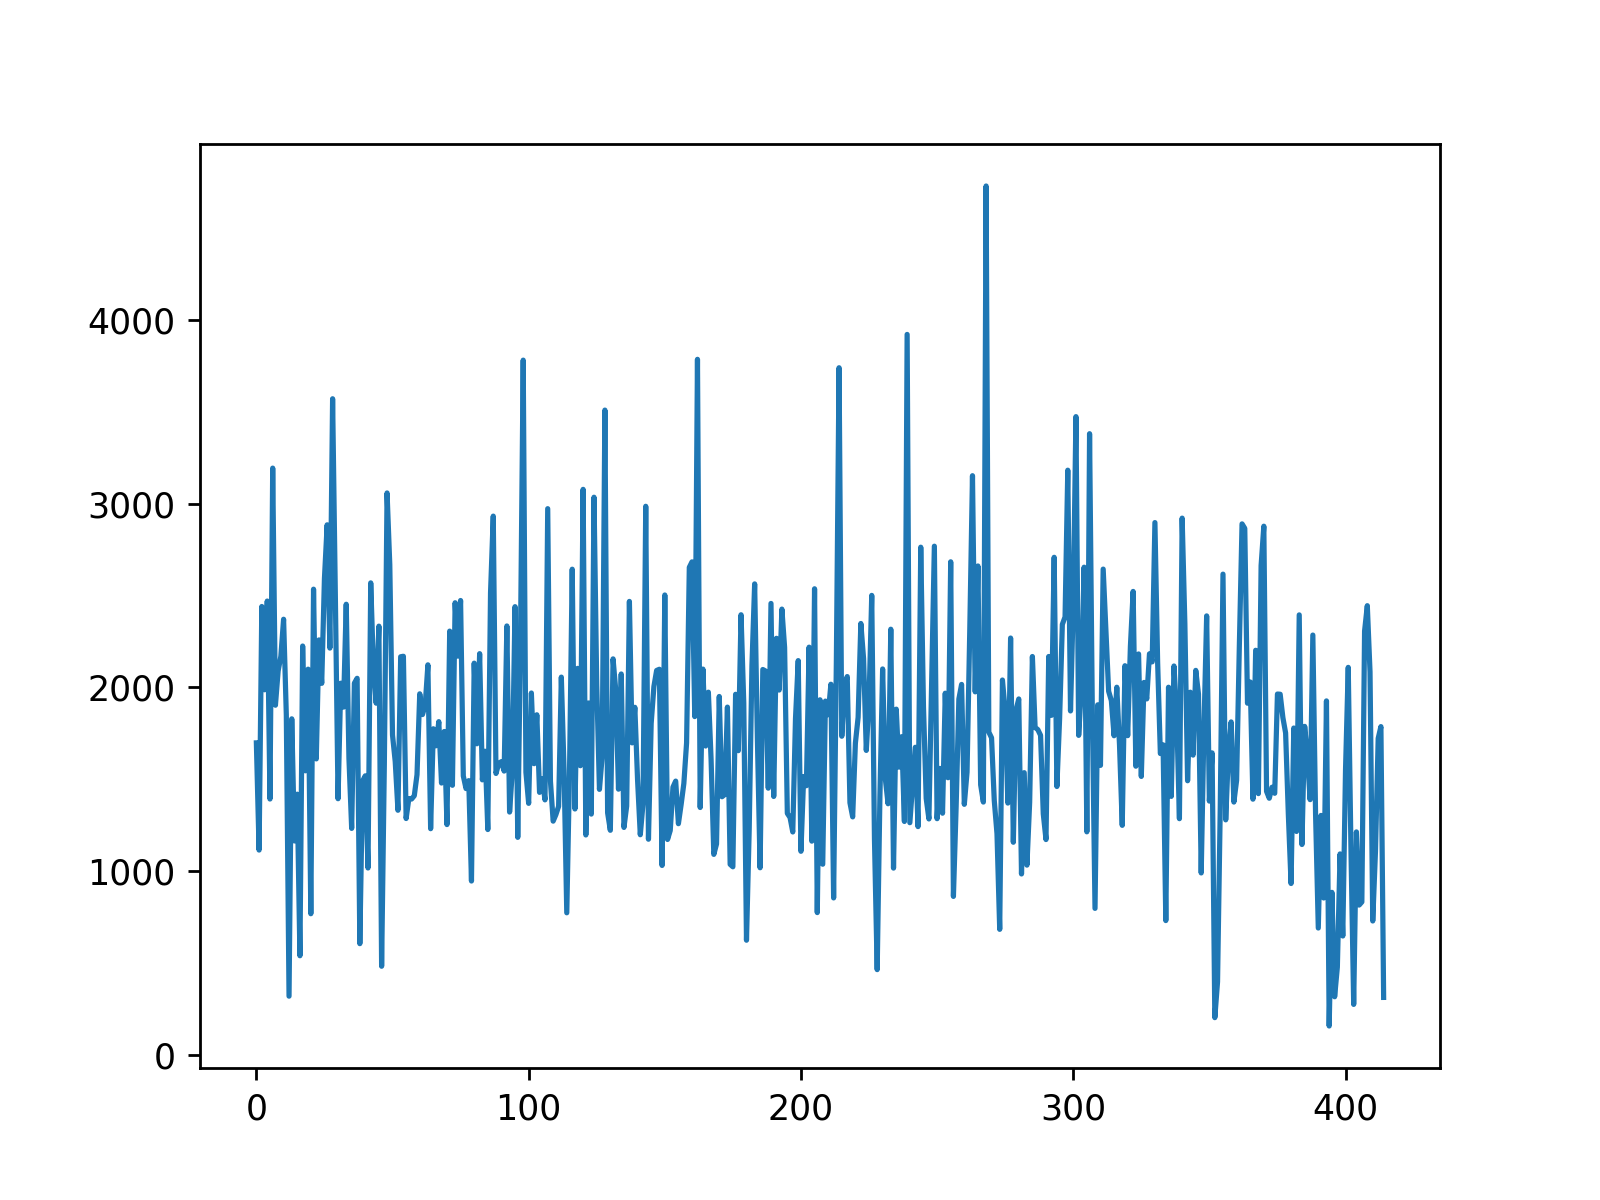

In [66]:
plt.figure()
plt.plot(mutant_avg_filtered_dataframes['metadata']['one_thru_three_relative_growth'].values)
plt.show()
